In [1]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re
import string
import random
import nltk

import warnings
warnings.filterwarnings("ignore")

from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from PIL import Image
from io import BytesIO
from sklearn.metrics.pairwise import cosine_similarity

pd.set_option('display.max_rows', 500)

In [2]:
# import books.csv

books = pd.read_csv('books.csv')
books.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [3]:
# find the colmumns of dataframe

books.columns

Index(['isbn13', 'isbn10', 'title', 'subtitle', 'authors', 'categories',
       'thumbnail', 'description', 'published_year', 'average_rating',
       'num_pages', 'ratings_count'],
      dtype='object')

In [4]:
# count the rows in each column

books.count()

isbn13            6810
isbn10            6810
title             6810
subtitle          2381
authors           6738
categories        6711
thumbnail         6481
description       6548
published_year    6804
average_rating    6767
num_pages         6767
ratings_count     6767
dtype: int64

In [5]:
# print the datatype and shape of raw data

print (books.dtypes)
print (books.shape)

isbn13              int64
isbn10             object
title              object
subtitle           object
authors            object
categories         object
thumbnail          object
description        object
published_year    float64
average_rating    float64
num_pages         float64
ratings_count     float64
dtype: object
(6810, 12)


In [6]:
import missingno as msno

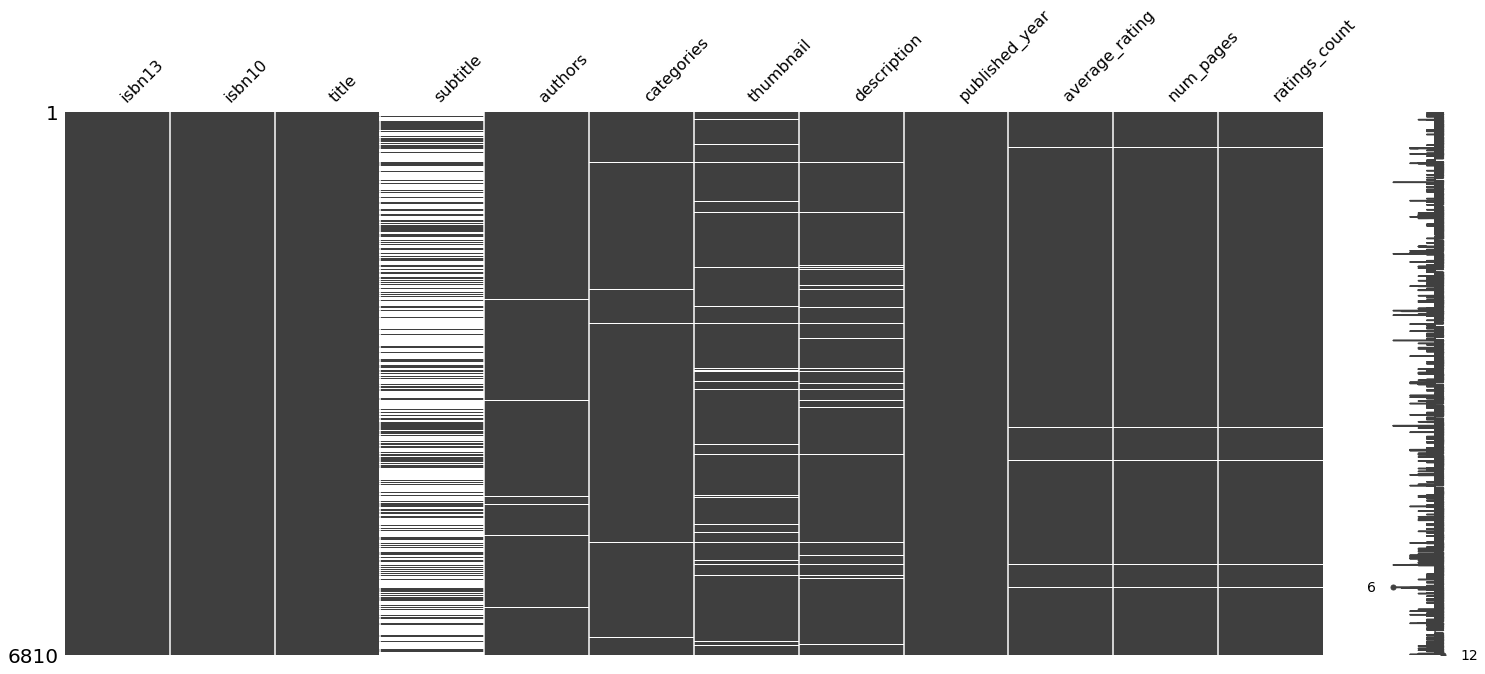

In [7]:
## matrix to show null values

msno.matrix(books)
plt.show()

In [8]:
## remove null values

books = books[books['average_rating'].notna()]
books = books[books['num_pages'].notna()]
books = books[books['ratings_count'].notna()]
books = books[books['published_year'].notna()]
books = books[books['thumbnail'].notna()]
books = books.replace(np.nan, '', regex=True)
books.count()

isbn13            6448
isbn10            6448
title             6448
subtitle          6448
authors           6448
categories        6448
thumbnail         6448
description       6448
published_year    6448
average_rating    6448
num_pages         6448
ratings_count     6448
dtype: int64

In [9]:
# convert published_year to int

books['published_year'] = books['published_year'].astype(int)
print (books.dtypes)

isbn13              int64
isbn10             object
title              object
subtitle           object
authors            object
categories         object
thumbnail          object
description        object
published_year      int64
average_rating    float64
num_pages         float64
ratings_count     float64
dtype: object


In [10]:
books[books.duplicated(keep=False)]

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count


In [11]:
books['categories'].nunique()

511

In [12]:
books_df1 = books
books_df1.head(10)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002,4.15,170.0,33684.0
5,9780006280934,0006280935,The Problem of Pain,,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002,4.09,176.0,37569.0
6,9780006353287,0006353282,An Autobiography,,Agatha Christie,"Authors, English",http://books.google.com/books/content?id=c49GQ...,Donation.,1977,4.27,560.0,3975.0
7,9780006380832,0006380832,Empires of the Monsoon,A History of the Indian Ocean and Its Invaders,Richard Hall,"Africa, East",http://books.google.com/books/content?id=MuPEQ...,Until Vasco da Gama discovered the sea-route t...,1998,4.41,608.0,65.0
8,9780006470229,000647022X,The Gap Into Madness,Chaos and Order,Stephen R. Donaldson,"Hyland, Morn (Fictitious character)",http://books.google.com/books/content?id=4oXav...,A new-cover reissue of the fourth book in the ...,1994,4.15,743.0,103.0
9,9780006472612,0006472613,Master of the Game,,Sidney Sheldon,Adventure stories,http://books.google.com/books/content?id=TkTYp...,Kate Blackwell is an enigma and one of the mos...,1982,4.11,489.0,43540.0


In [13]:
import matplotlib as mpl

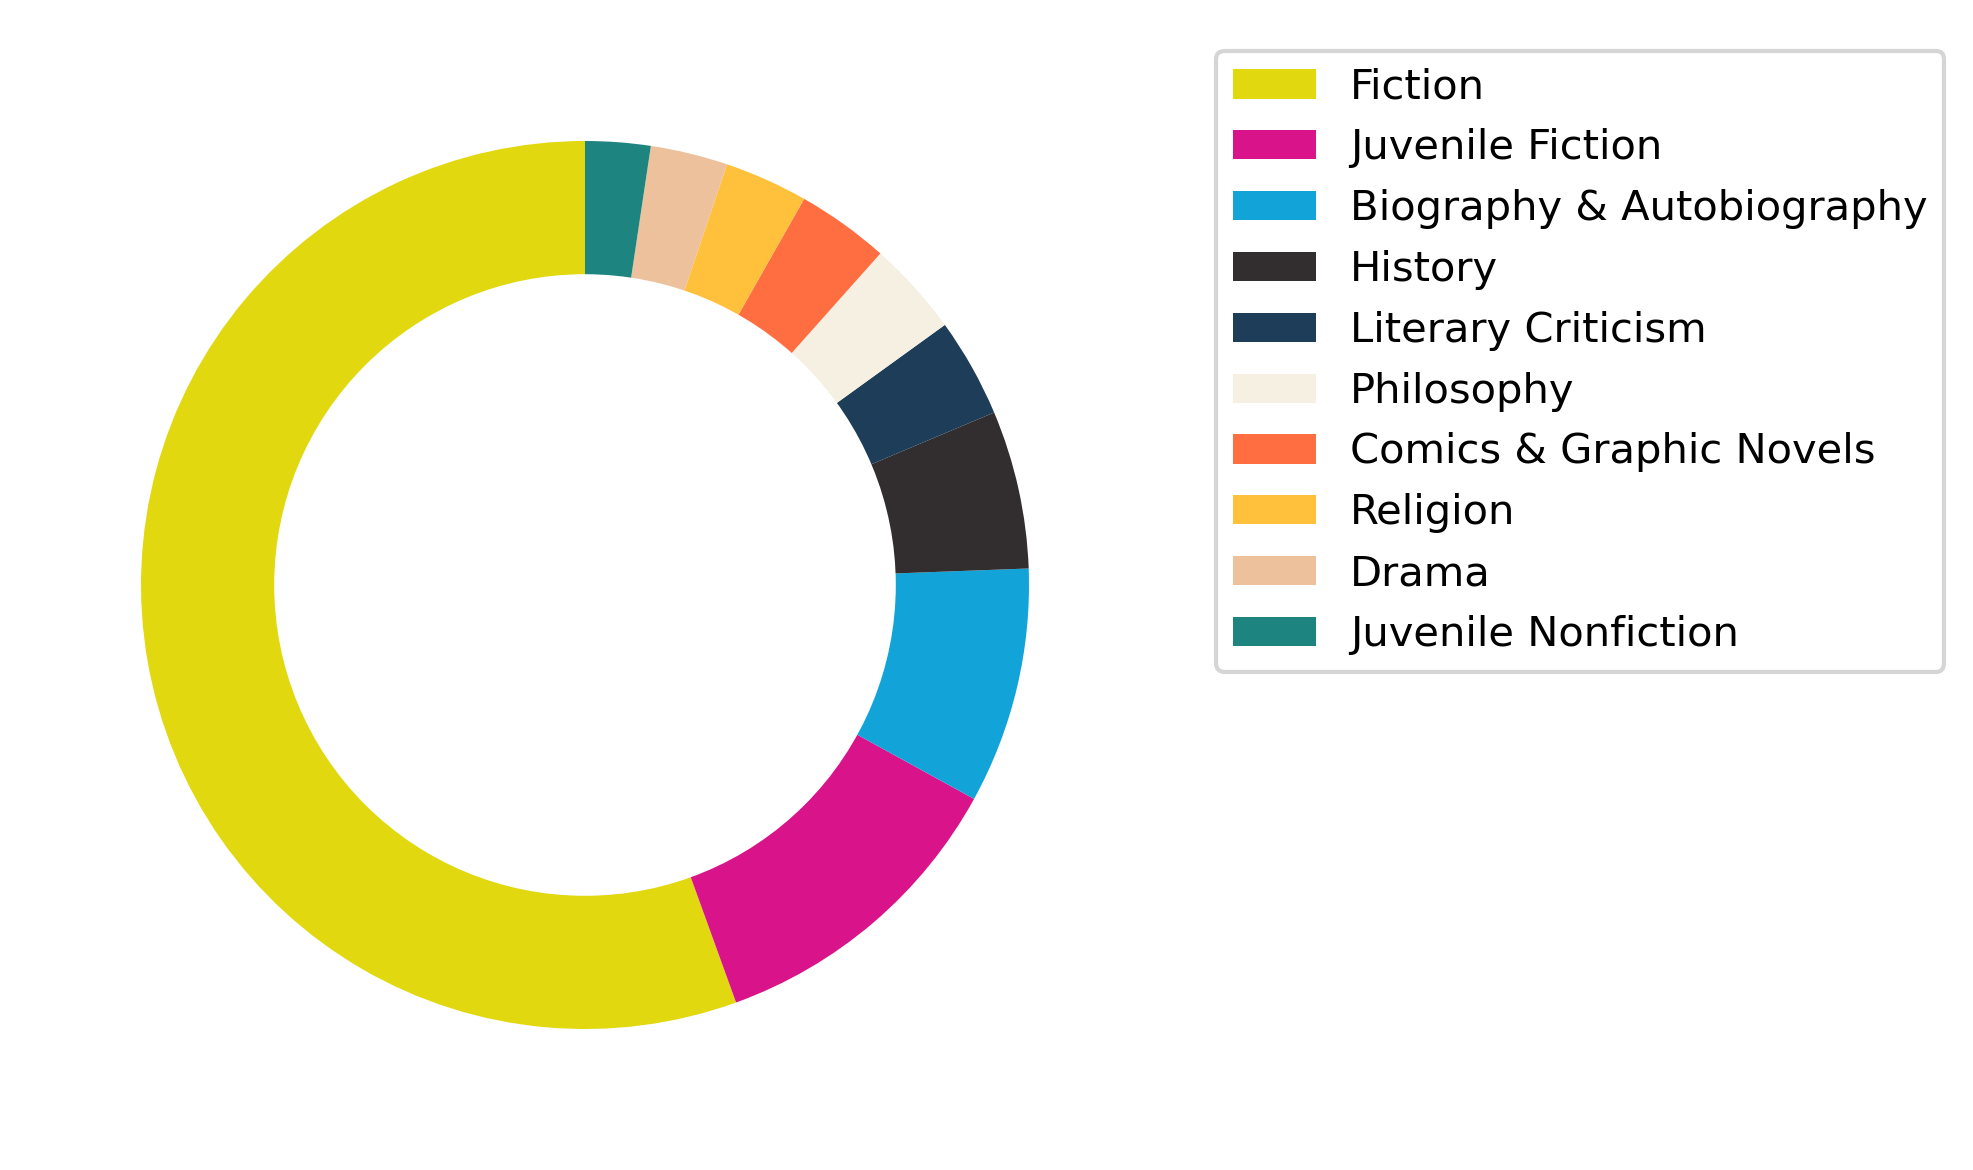

In [14]:
## find top 5 genres

mpl.rcParams['figure.dpi'] = 300
top_10 = books_df1['categories'].value_counts()[:10]
colors = ['#e2d810', '#d9138a', '#12a4d9', '#322e2f','#1e3d59', '#f5f0e1', '#ff6e40', '#ffc13b','#ecc19c', '#1e847f']
patches, texts = plt.pie(top_10,colors = colors,startangle=90)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(patches, top_10.index, loc='upper left',bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

<AxesSubplot:>

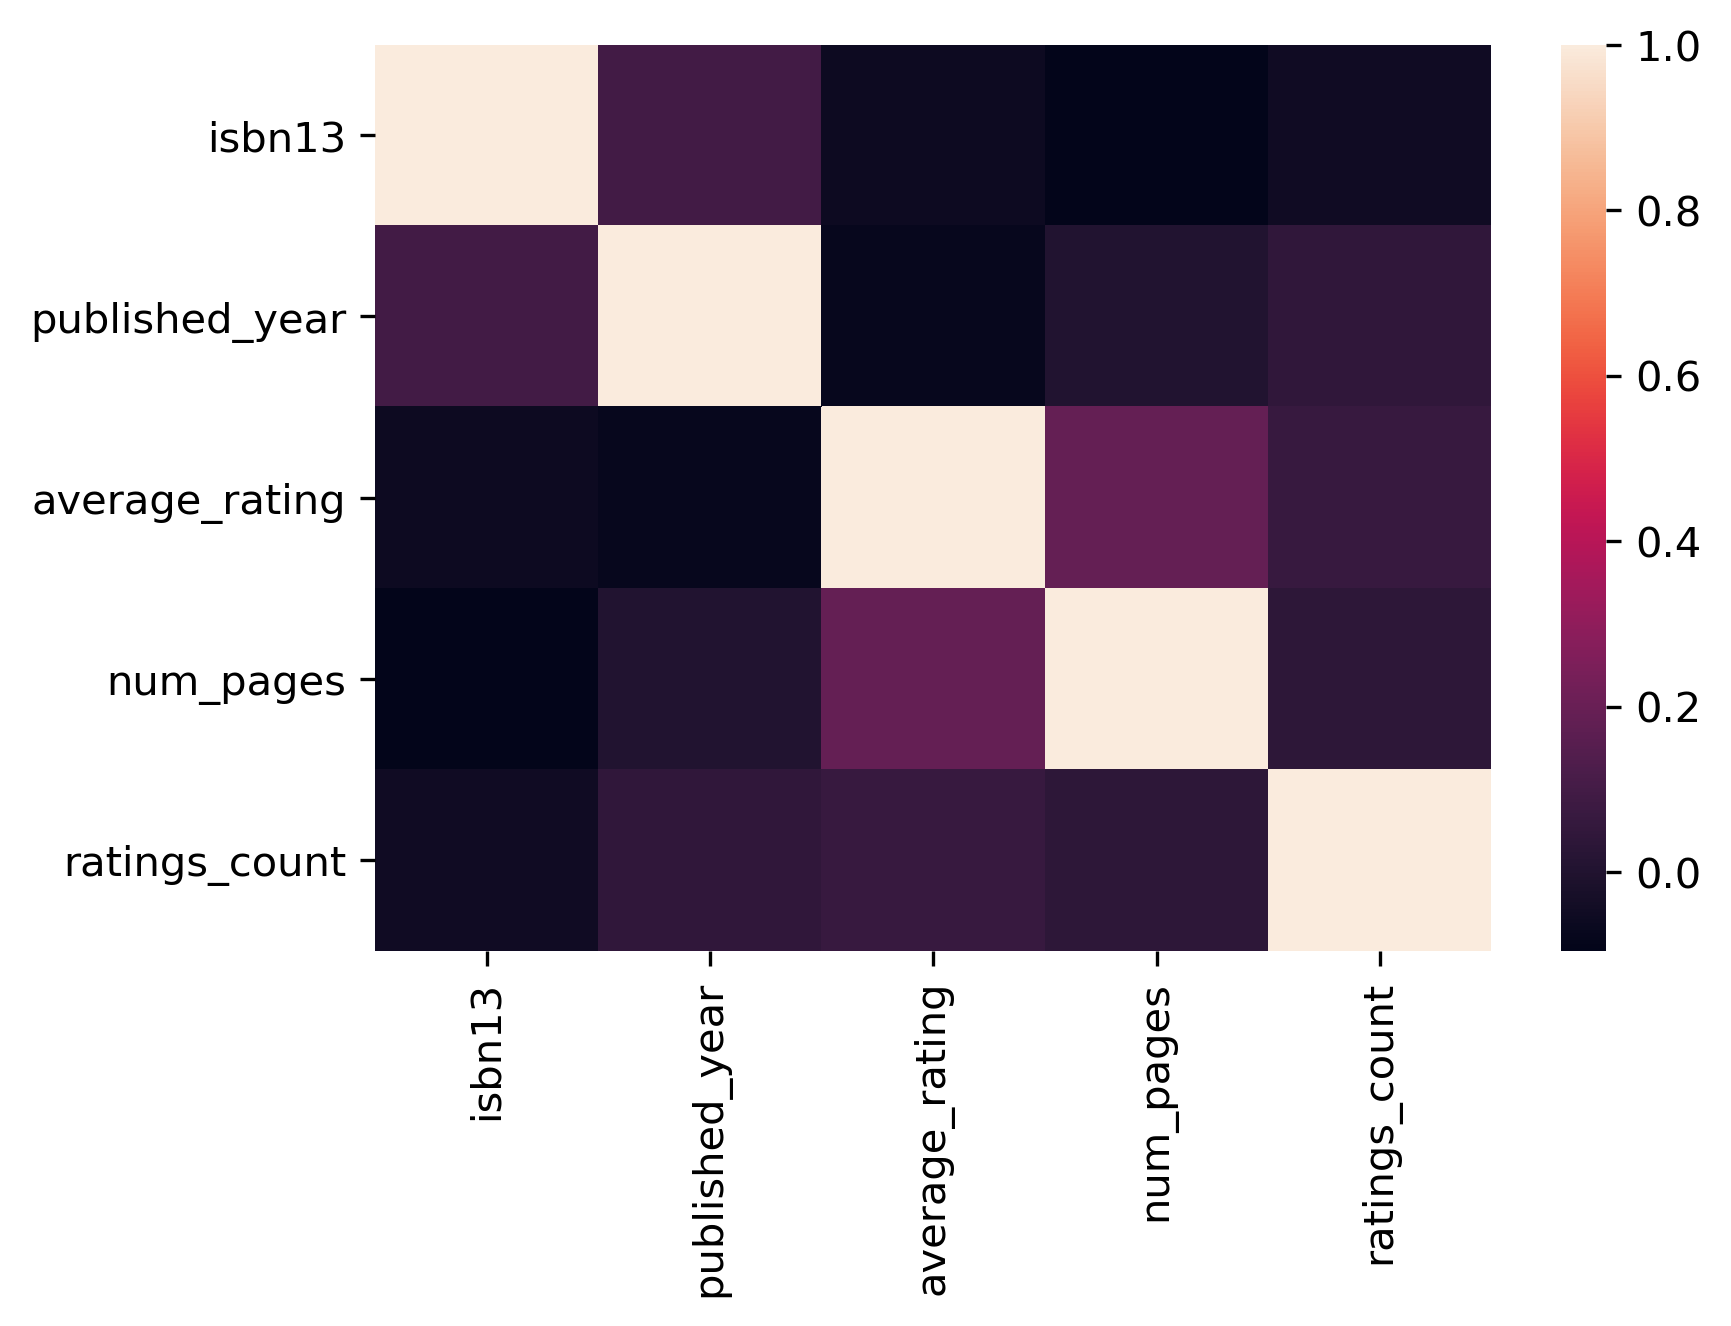

In [15]:
corr = books.corr()
sns.heatmap(corr)

In [16]:
from IPython.core.display import HTML

In [17]:
## top 50 best rated books

pop_ratings_df = books
pop_ratings_df['popularity_rating'] = books.average_rating*books.ratings_count
pop_ratings_df = pop_ratings_df.sort_values(by = ['popularity_rating'], ascending = False)[0:50]
def path_to_image_html(path):
    return '<img src="'+ path + '" width="200" >'
del pop_ratings_df['popularity_rating']
HTML(pop_ratings_df.to_html(escape=False,formatters=dict(thumbnail=path_to_image_html)))

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
2698,9780439554930,0439554934,Harry Potter and the Sorcerer's Stone (Book 1),,"Rowling, J.K.",Juvenile Fiction,,"In Harry Potter and the Sorcerer's Stone, Harry, an orphan, lives with the Dursleys, his horrible aunt and uncle, and their abominable son, Dudley. One day just before his eleventh birthday, an owl tries to deliver a mysterious letter—the first of a sequence of events that end in Harry meeting a giant man named Hagrid. Hagrid explains Harry's history to him: When he was a baby, the Dark wizard, Lord Voldemort, attacked and killed his parents in an attempt to kill Harry; but the only mark on Harry was a mysterious lightning-bolt scar on his forehead. Now he has been invited to attend Hogwarts School of Witchcraft and Wizardry, where the headmaster is the great wizard Albus Dumbledore. Harry visits Diagon Alley to get his school supplies, especially his very own wand. To get to school, he takes the Hogwarts Express from platform nine and three-quarters at King's Cross Station. On the train, he meets two fellow students who will become his closest friends: Ron Weasley and Hermione Granger. Harry is assigned to Gryffindor House at Hogwarts, and soon becomes the youngest-ever Seeker on the House Quidditch team. He also studies Potions with Professor Severus Snape, who displays a deep and abiding dislike for Harry, and Defense Against the Dark Arts with nervous Professor Quirrell; he and his friends defeat a mountain troll, help Hagrid raise a dragon, and explore the wonderful, fascinating world of Hogwarts. But all events lead irrevocably toward a second encounter with Lord Voldemort, who seeks an object of legend known as the Sorcerer's Stone…",2015,4.47,320.0,5629932.0
3741,9780618260300,0618260307,"The Hobbit, Or, There and Back Again",,John Ronald Reuel Tolkien,Juvenile Fiction,,"A newly rejacketed edition of the classic tale chronicles the adventures of the inhabitants of Middle-earth and of Bilbo Baggins, the hobbit who brought home to The Shire the One Ring of Power.",2001,4.26,366.0,2364968.0
2710,9780439655484,043965548X,Harry Potter and the Prisoner of Azkaban (Book 3),,"Rowling, J.K.",Juvenile Fiction,,"For twelve long years, the dread fortress of Azkaban held an infamous prisoner named Sirius Black. Convicted of killing thirteen people with a single curse, he was said to be the heir apparent to the Dark Lord, Voldemort, and might even have assisted in the deaths of James and Lily Potter—Harry Potter’s parents. Now Black has escaped, leaving only two clues as to where he might be headed: Harry Potter's defeat of You-Know-Who was Black's downfall as well. And the Azkaban guards heard him muttering in his sleep, ""He’s at Hogwarts... he’s at Hogwarts."" Of course, Harry already had plenty to worry about. After inflating his nasty aunt and running away on the magical Knight Bus, he finds he’s being pursued by death omens at every turn. He receives two wonderful gifts: a top-of-the-line Firebolt broomstick, and the Marauder’s Map, a magical diagram of Hogwarts made by the mysterious “Moony, Wormtail, Padfoot, and Prongs.” Hermione disappears frequently, burdened down by a seemingly impossible course schedule. And the soulless Dementors have come to guard Hogwarts—supposedly to protect Harry from Sirius Black, but they terrify Harry more than the fugitive ever could. To strengthen himself against them, Harry reaches out to Remus Lupin, the Defense Against the Dark Arts teacher who was once a friend of his father’s. Lupin teaches Harry about the Patronus Charm, a defensive measure well above the level of magic generally mastered by wizards Harry’s age. But even with his broom, his map, his magic, and his loyal friends, Harry isn't safe. Because on top of everything else, there’s a traitor hidden at Hogwarts…",2015,4.55,435.0,2149872.0
2661,9780439064866,0439064864,Harry Potter and the Chamber 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, "Harry Potter and the Sorcerer's Stone (Book 1)"),
  Text(1, 0, 'The Hobbit, Or, There and Back Again'),
  Text(2, 0, 'Harry Potter and the Prisoner of Azkaban (Book 3)'),
  Text(3, 0, 'Harry Potter and the Chamber of Secrets (Book 2)'),
  Text(4, 0, 'Harry Potter and the Order of the Phoenix (Book 5)'),
  Text(5, 0, 'Harry Potter and the Half-Blood Prince (Book 6)'),
  Text(6, 0, 'The Fellowship of the Ring'),
  Text(7, 0, 'Romeo and Juliet'),
  Text(8, 0, 'The Alchemist'),
  Text(9, 0, 'Robert Langdon Novels'),
  Text(10, 0, 'The Giver'),
  Text(11, 0, 'Jane Eyre'),
  Text(12, 0, "Charlotte's Web (full color)"),
  Text(13, 0, 'Water for Elephants'),
  Text(14, 0, 'Brave New World'),
  Text(15, 0, 'Eat, Pray, Love'),
  Text(16, 0, 'Wuthering Heights'),
 

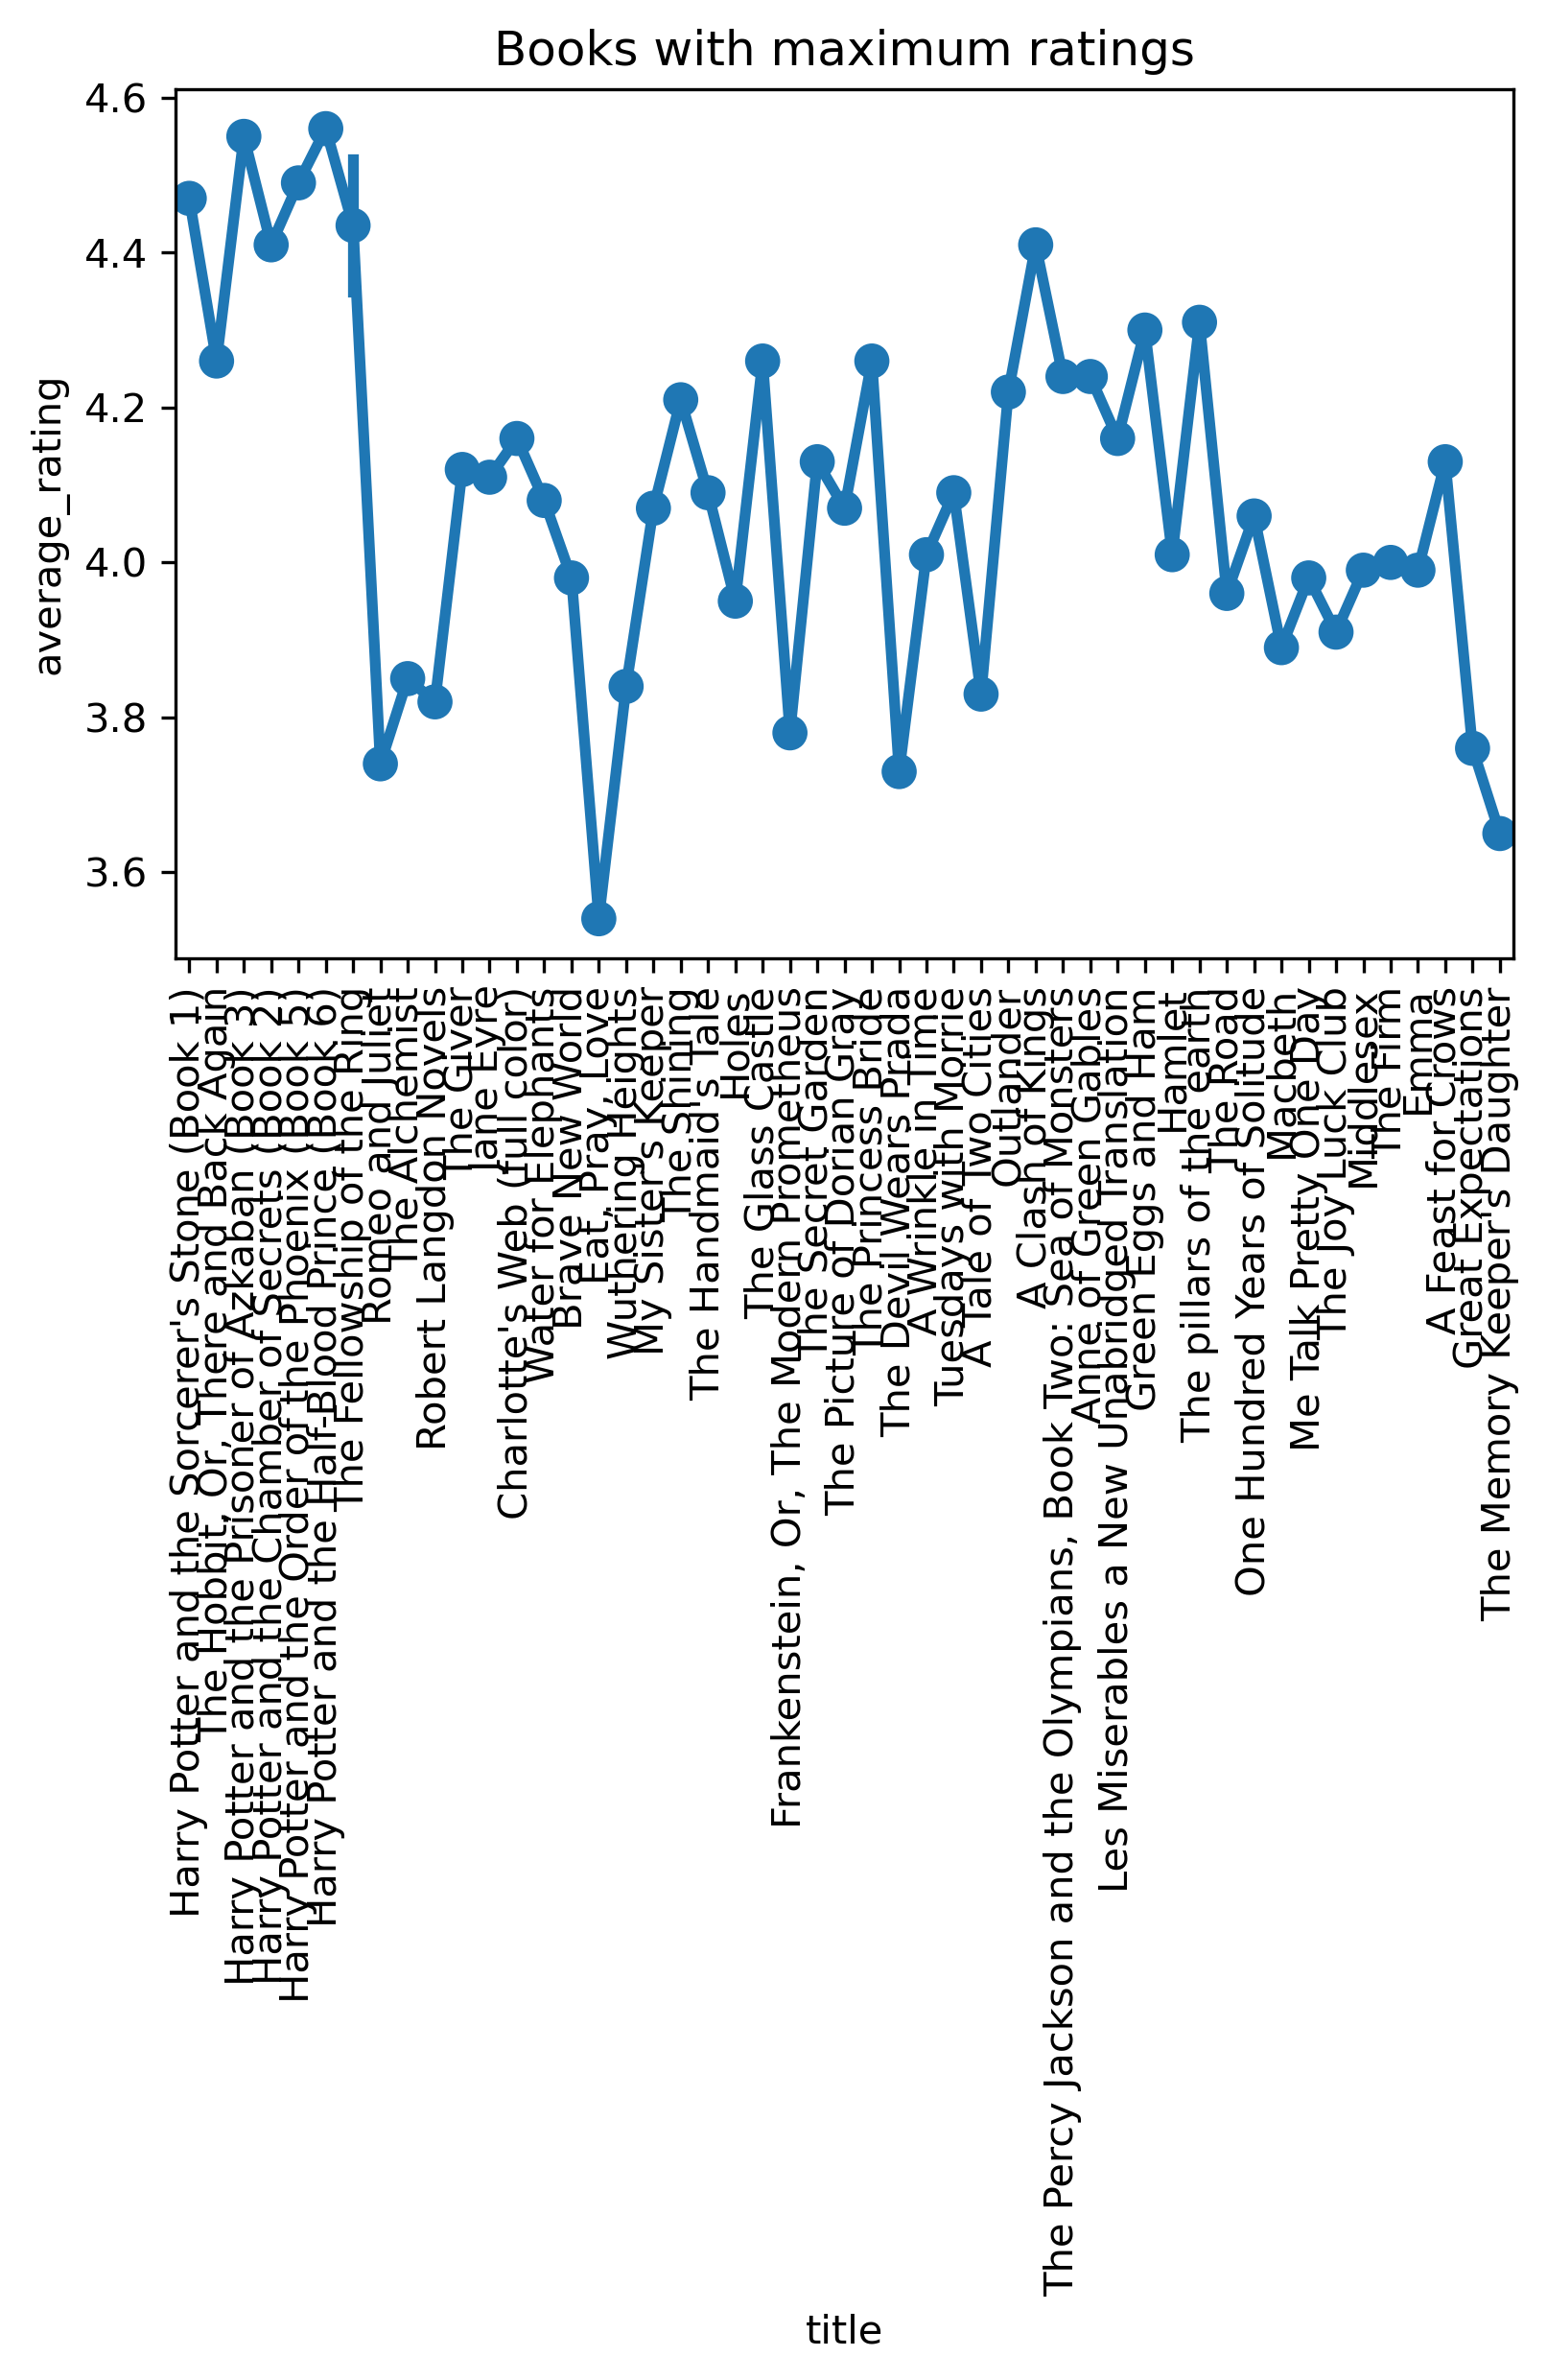

In [18]:
#plot the top 50 best rated books

plt.title('Books with maximum ratings')
sns.pointplot(x='title', y='average_rating', data=pop_ratings_df)

plt.xticks(rotation=90)

In [19]:
#authors with top 10 ratings

pop_ratings_10 = books
pop_ratings_10['popularity_rating'] = books.average_rating*books.ratings_count

pop_ratings_10 = pop_ratings_10.sort_values(by = ['popularity_rating'], ascending = False)[0:10]

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Rowling, J.K.'),
  Text(1, 0, 'John Ronald Reuel Tolkien'),
  Text(2, 0, 'J. R. R. Tolkien'),
  Text(3, 0, 'William Shakespeare'),
  Text(4, 0, 'Paulo Coelho'),
  Text(5, 0, 'Dan Brown')])

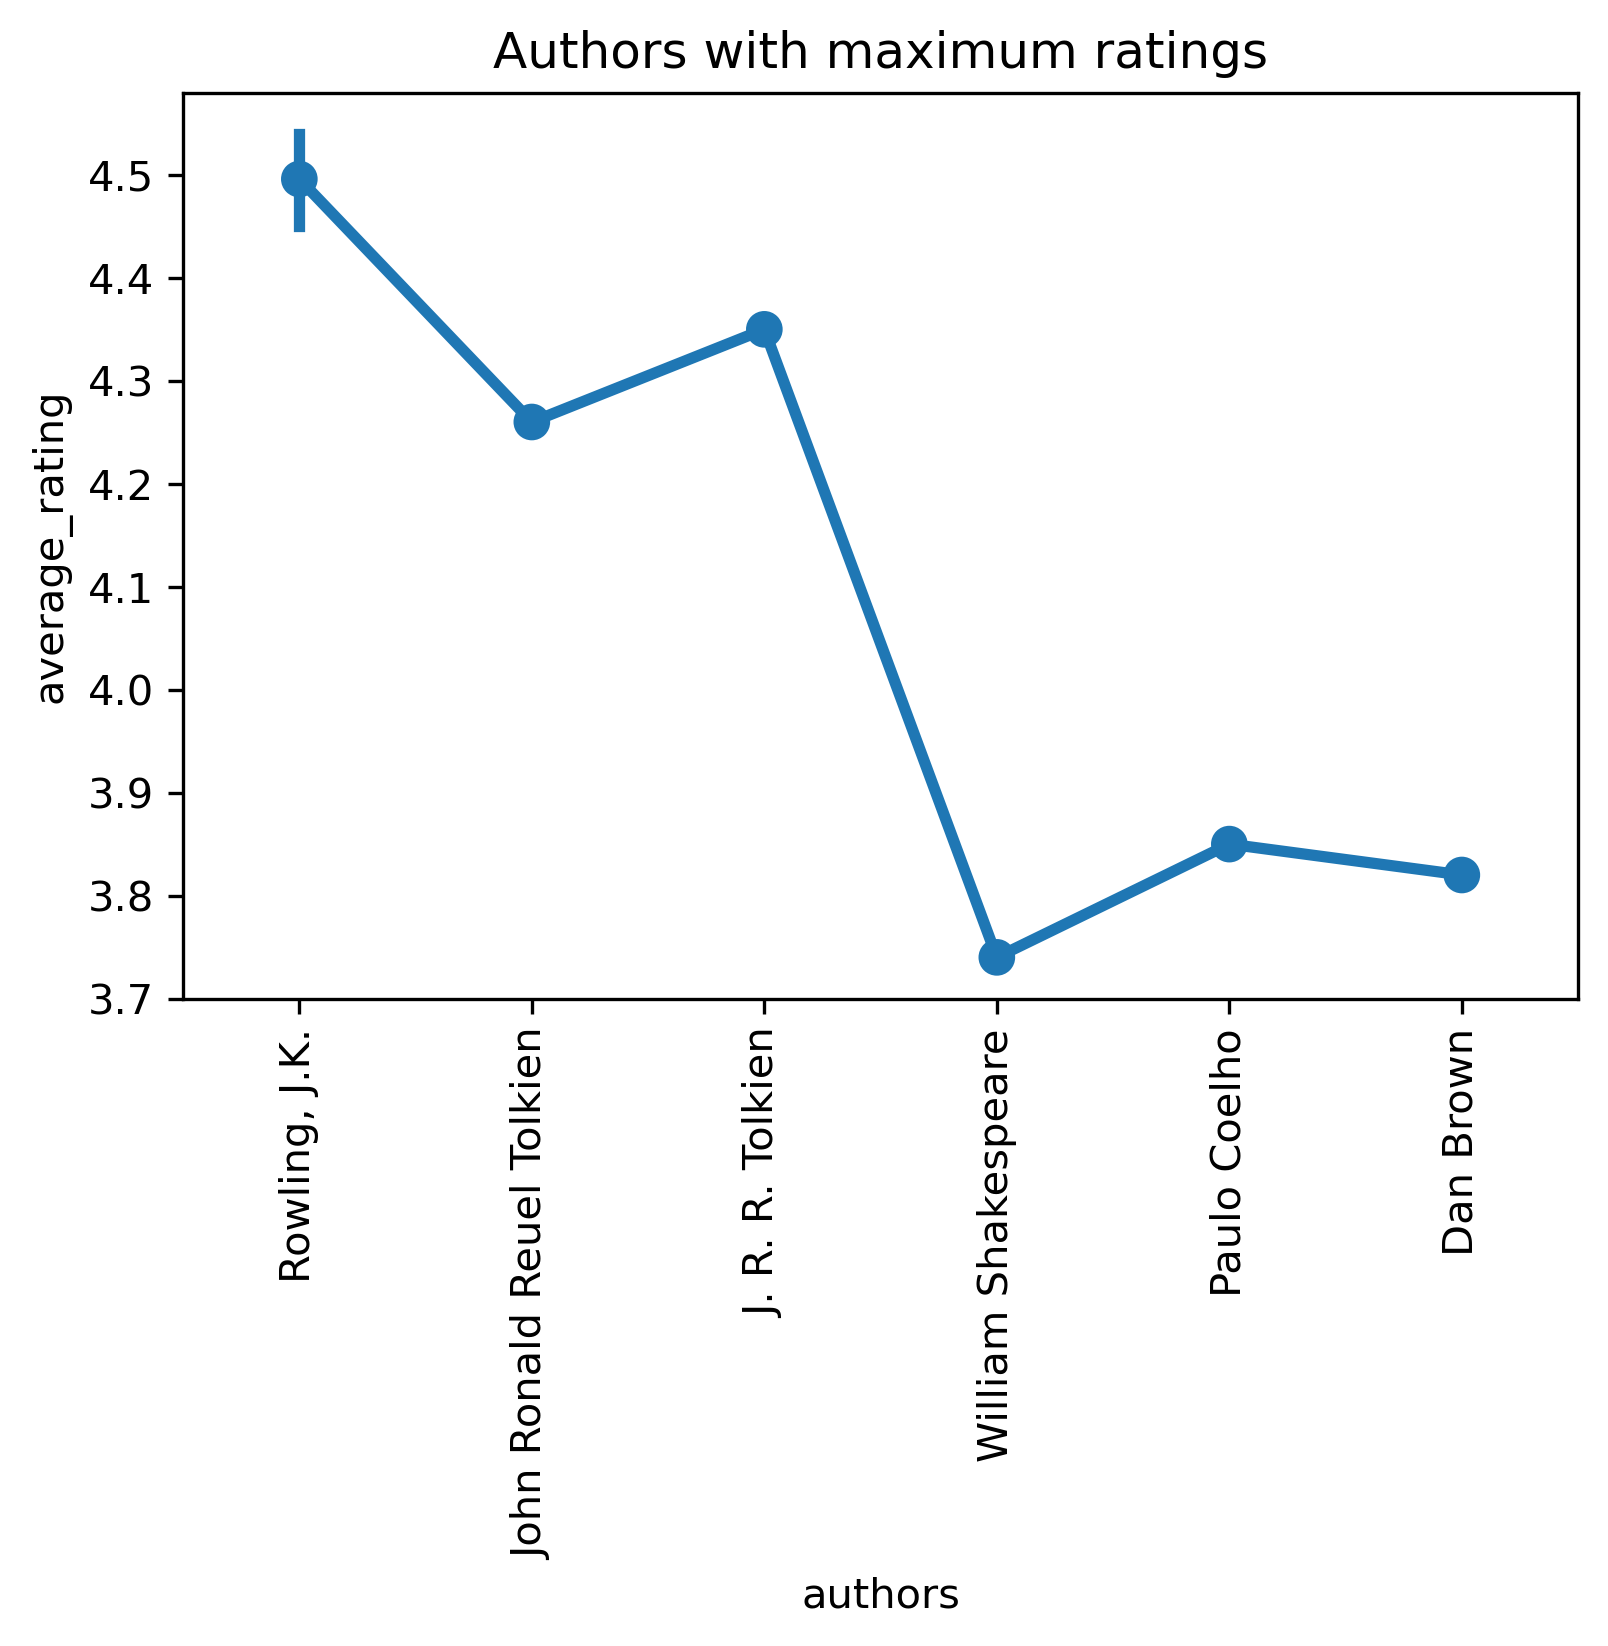

In [20]:
plt.title('Authors with maximum ratings')
sns.pointplot(x='authors', y='average_rating', data=pop_ratings_10)

plt.xticks(rotation=90)

In [21]:
## top 10 years with maximum ratings count

pop_years_10 = books
pop_years_10['popular_years'] = books.published_year*books.ratings_count

pop_years_10 = pop_years_10.sort_values(by = ['popular_years'], ascending = False)[0:10]

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1992'),
  Text(1, 0, '2001'),
  Text(2, 0, '2003'),
  Text(3, 0, '2006'),
  Text(4, 0, '2015')])

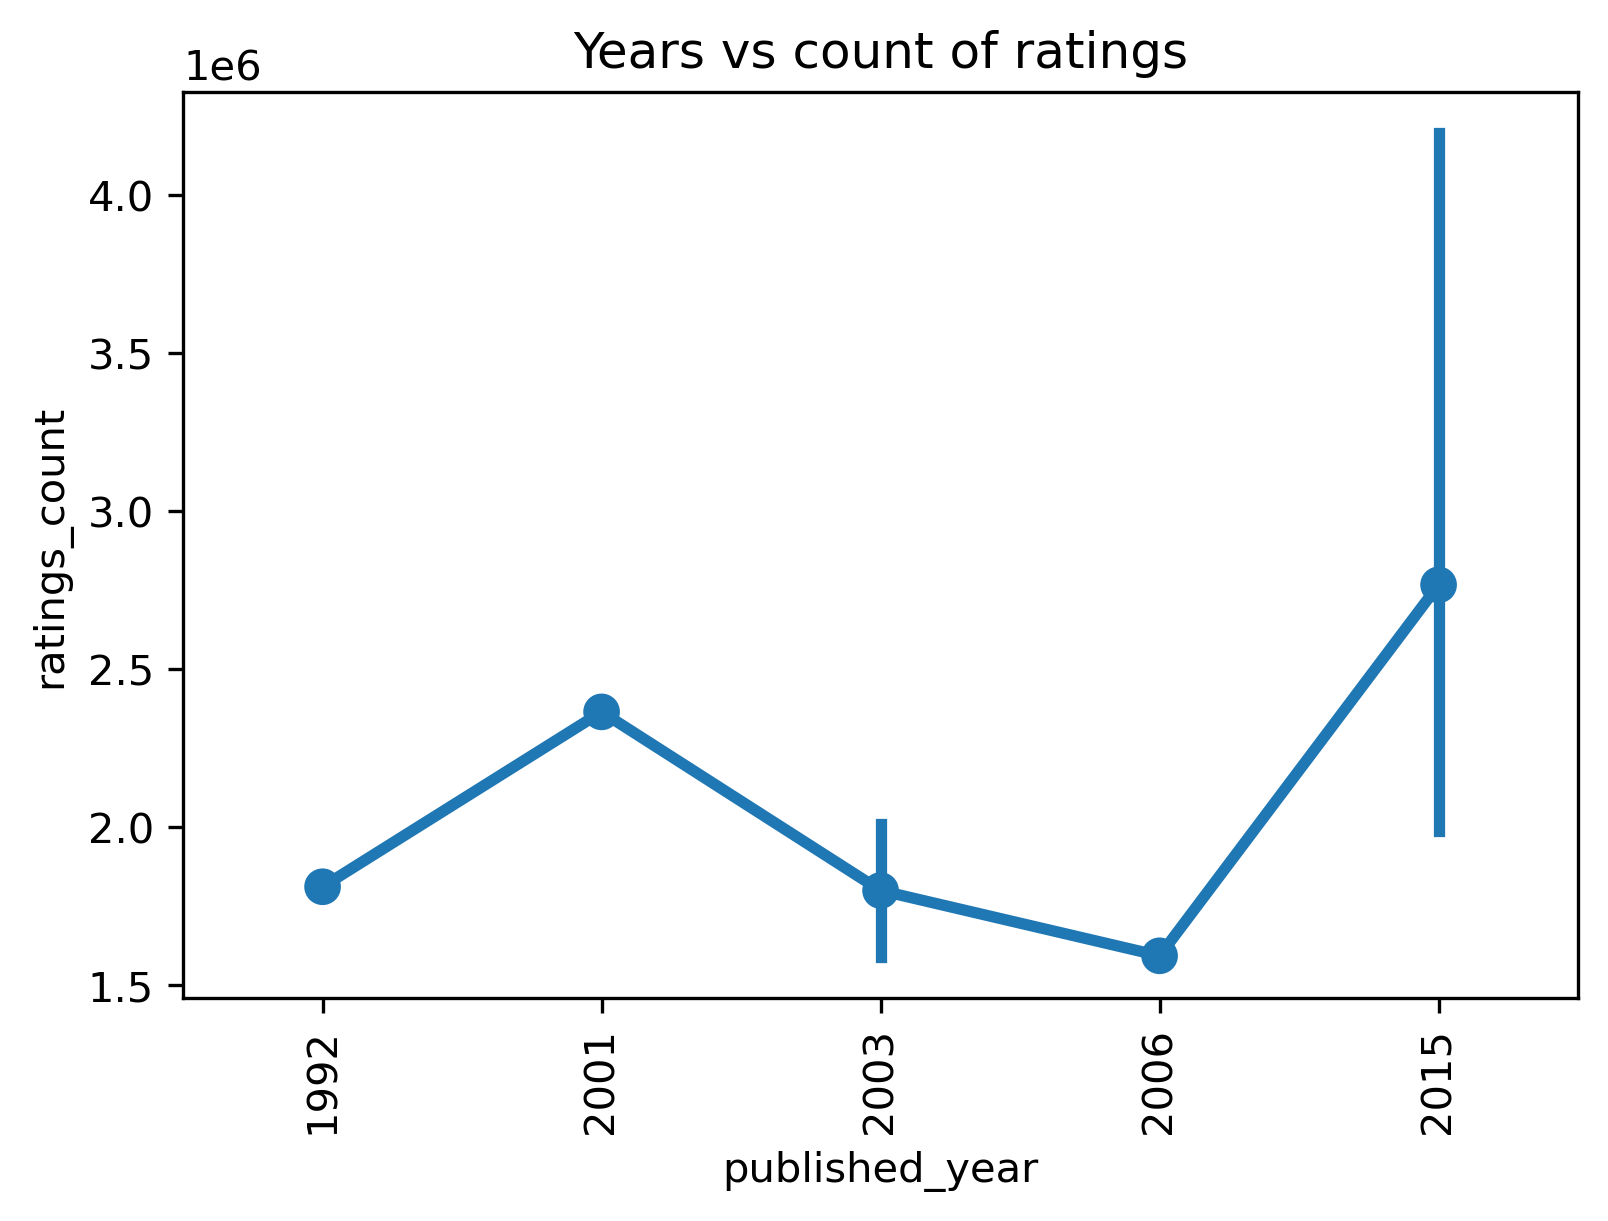

In [22]:
## Relation between years and number of ratings

plt.title('Years vs count of ratings')
sns.pointplot(x='published_year', y='ratings_count', data=pop_years_10)

plt.xticks(rotation=90)

In [23]:
# use books of only 5 genres

books_df1 = books.loc[books['categories'].isin(['Fiction', 'Juvenile Fiction', 
                                                    'Biography & Autobiography', 'History', 'Literary Criticism'])]

books_df1.tail()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,popularity_rating,popular_years
6778,9781933648279,1933648279,Night Has a Thousand Eyes,,Cornell Woolrich,Fiction,http://books.google.com/books/content?id=3Gk6s...,"""Cornell Woolrich's novels define the essence ...",2007,3.77,344.0,680.0,2563.60,1364760.0
6797,9784770028969,4770028962,Coin Locker Babies,,村上龍,Fiction,http://books.google.com/books/content?id=87DJw...,Rescued from the lockers in which they were le...,2002,3.75,393.0,5560.0,20850.00,11131120.0
6799,9788122200850,8122200850,"Cry, the Peacock",,Anita Desai,Fiction,http://books.google.com/books/content?id=_QKwV...,This book is the story of a young girl obsesse...,1980,3.22,218.0,134.0,431.48,265320.0
6808,9789027712059,9027712050,The Berlin Phenomenology,,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981,0.00,210.0,0.0,0.00,0.0
6809,9789042003408,9042003405,'I'm Telling You Stories',Jeanette Winterson and the Politics of Reading,Helena Grice;Tim Woods,Literary Criticism,http://books.google.com/books/content?id=2lVyR...,This is a jubilant and rewarding collection of...,1998,3.70,136.0,10.0,37.00,19980.0


In [24]:
books_df1 = books_df1.drop(columns=['isbn13', 'isbn10', 'subtitle', 'average_rating', 'num_pages', 'ratings_count', 'popularity_rating', 'popular_years'])
books_df1

,title,authors,categories,thumbnail,description,published_year
0,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004
3,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993
12,Warhost of Vastmark,Janny Wurts,Fiction,http://books.google.com/books/content?id=uOL0f...,"Tricked once more by his wily half-brother, Ly...",1995
35,Ocean Star Express,Mark Haddon;Peter Sutton,Juvenile Fiction,http://books.google.com/books/content?id=I2QZA...,Joe and his parents are enjoying a summer holi...,2002
37,The Princess of the Chalet School,Elinor Mary Brent-Dyer,Juvenile Fiction,http://books.google.com/books/content?id=EJcQP...,,2000
...,...,...,...,...,...,...
6778,Night Has a Thousand Eyes,Cornell Woolrich,Fiction,http://books.google.com/books/content?id=3Gk6s...,"""Cornell Woolrich's novels define the essence ...",2007
6797,Coin Locker Babies,村上龍,Fiction,http://books.google.com/books/content?id=87DJw...,Rescued from the lockers in which they were le...,2002
6799,"Cry, the Peacock",Anita Desai,Fiction,http://books.google.com/books/content?id=_QKwV...,This book is the story of a young girl obsesse...,1980
6808,The Berlin Phenomenology,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981


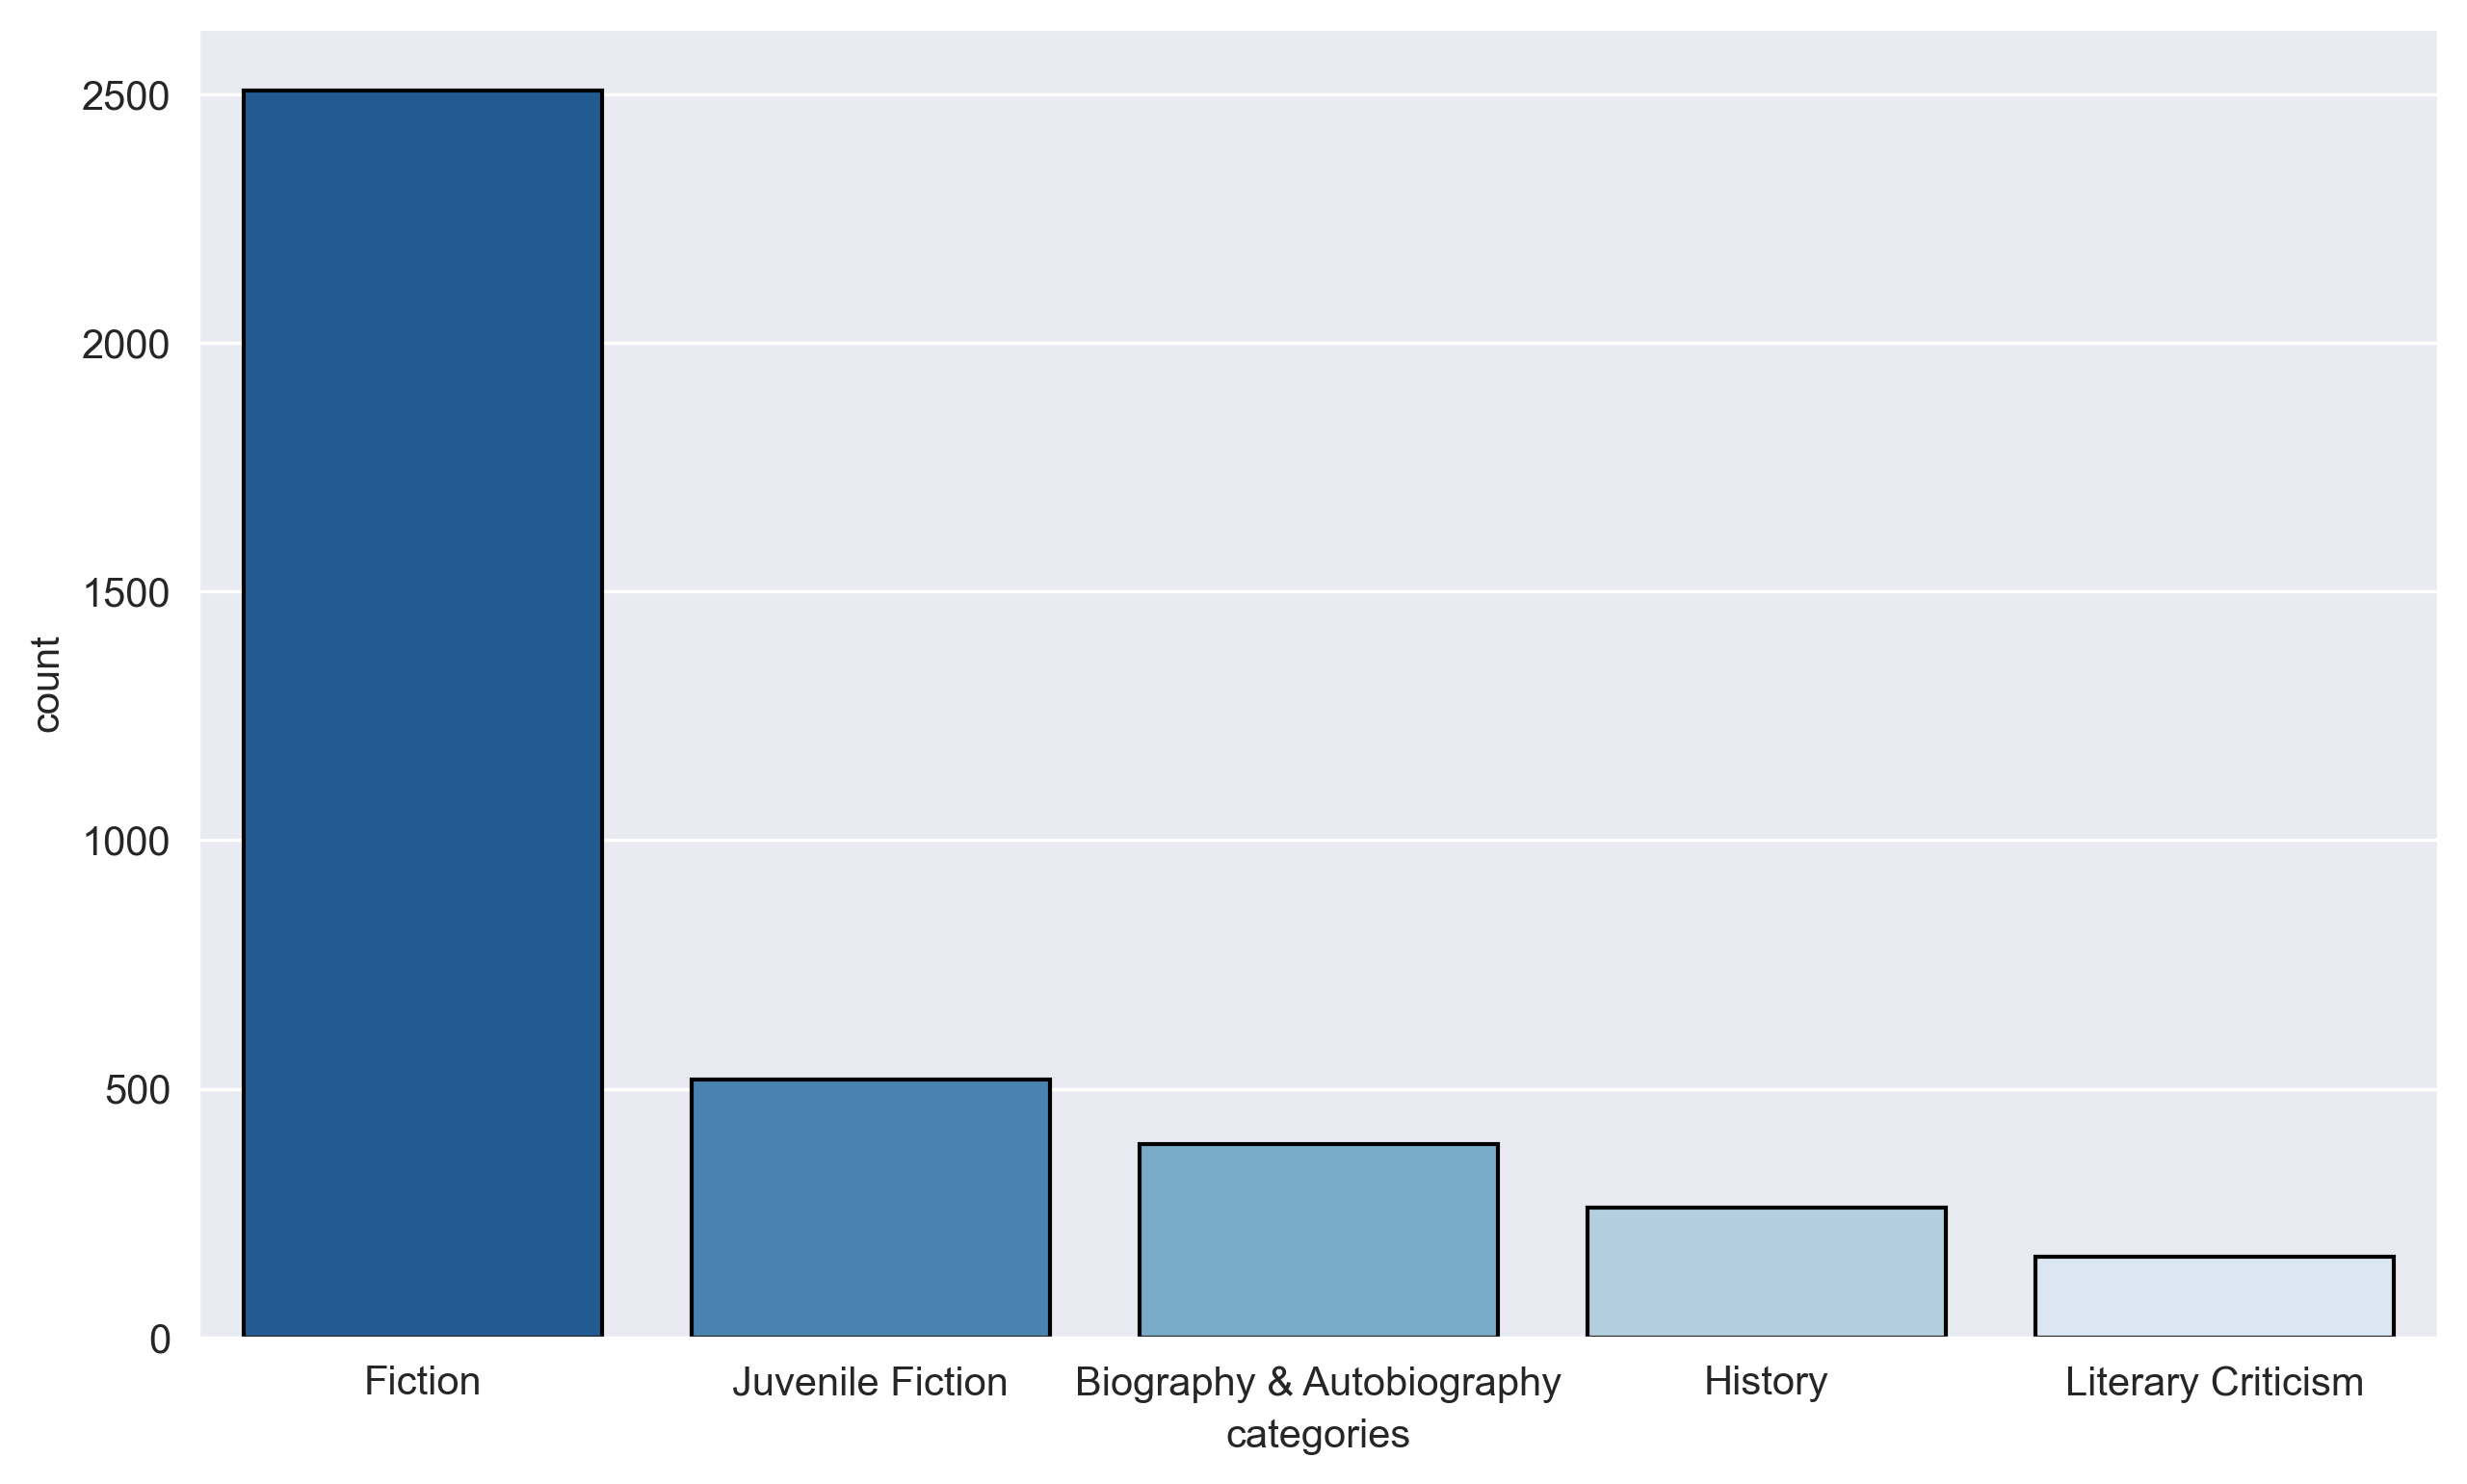

In [25]:
plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')
sns.countplot(x=books_df1['categories'], palette='Blues_r', edgecolor='black')

plt.show()

In [26]:
#view title and description of 2 randomly selected books

print(books_df1['title'] [12])
print(books_df1['description'] [12])
print('\n\n')
print(books_df1['title'] [6808])
print(books_df1['description'] [6808])

Warhost of Vastmark
Tricked once more by his wily half-brother, Lysaer, Lord of Light, arrives at the tiny harbor town of Merior to find that Arithon's ship yards have been abandoned and meticulously destroyed, and that the Master of Shadow has disappeared as if into thin air. Meanwhile Arithon and the Mad Prophet Dakar are traveling on foot through the treacherous Kelhorn Mountains towards the Vastmark clans, there to raise further support for his cause. But raising a warhost is a costly business. Is it mere coincidence that Princess Talith—Lysaer's beautiful, headstrong wife—is taken captive and held for a vast ransom by a master brigand? The forces of light and shadow circle and feint, drawing ever closer to a huge conflict. And in the background the Fellowship of Seven Sorcerers and the Koriani Enchantresses watch and plan, and wait.



The Berlin Phenomenology
Since the three volume edition ofHegel's Philosophy of Subjective Spirit (1978, 19792) has been so well received, I have b

In [27]:
# remove rows containing null values in description

books_df1.dropna(subset=['description'], inplace=True)

In [28]:
books_df1['description'].isna().sum()

0

In [29]:
books_df1 = books_df1[~books_df1.description.str.contains('[0-9].*[0-9].*[printing]')]

<AxesSubplot:title={'center':'Word Count for book descriptions'}, ylabel='Frequency'>

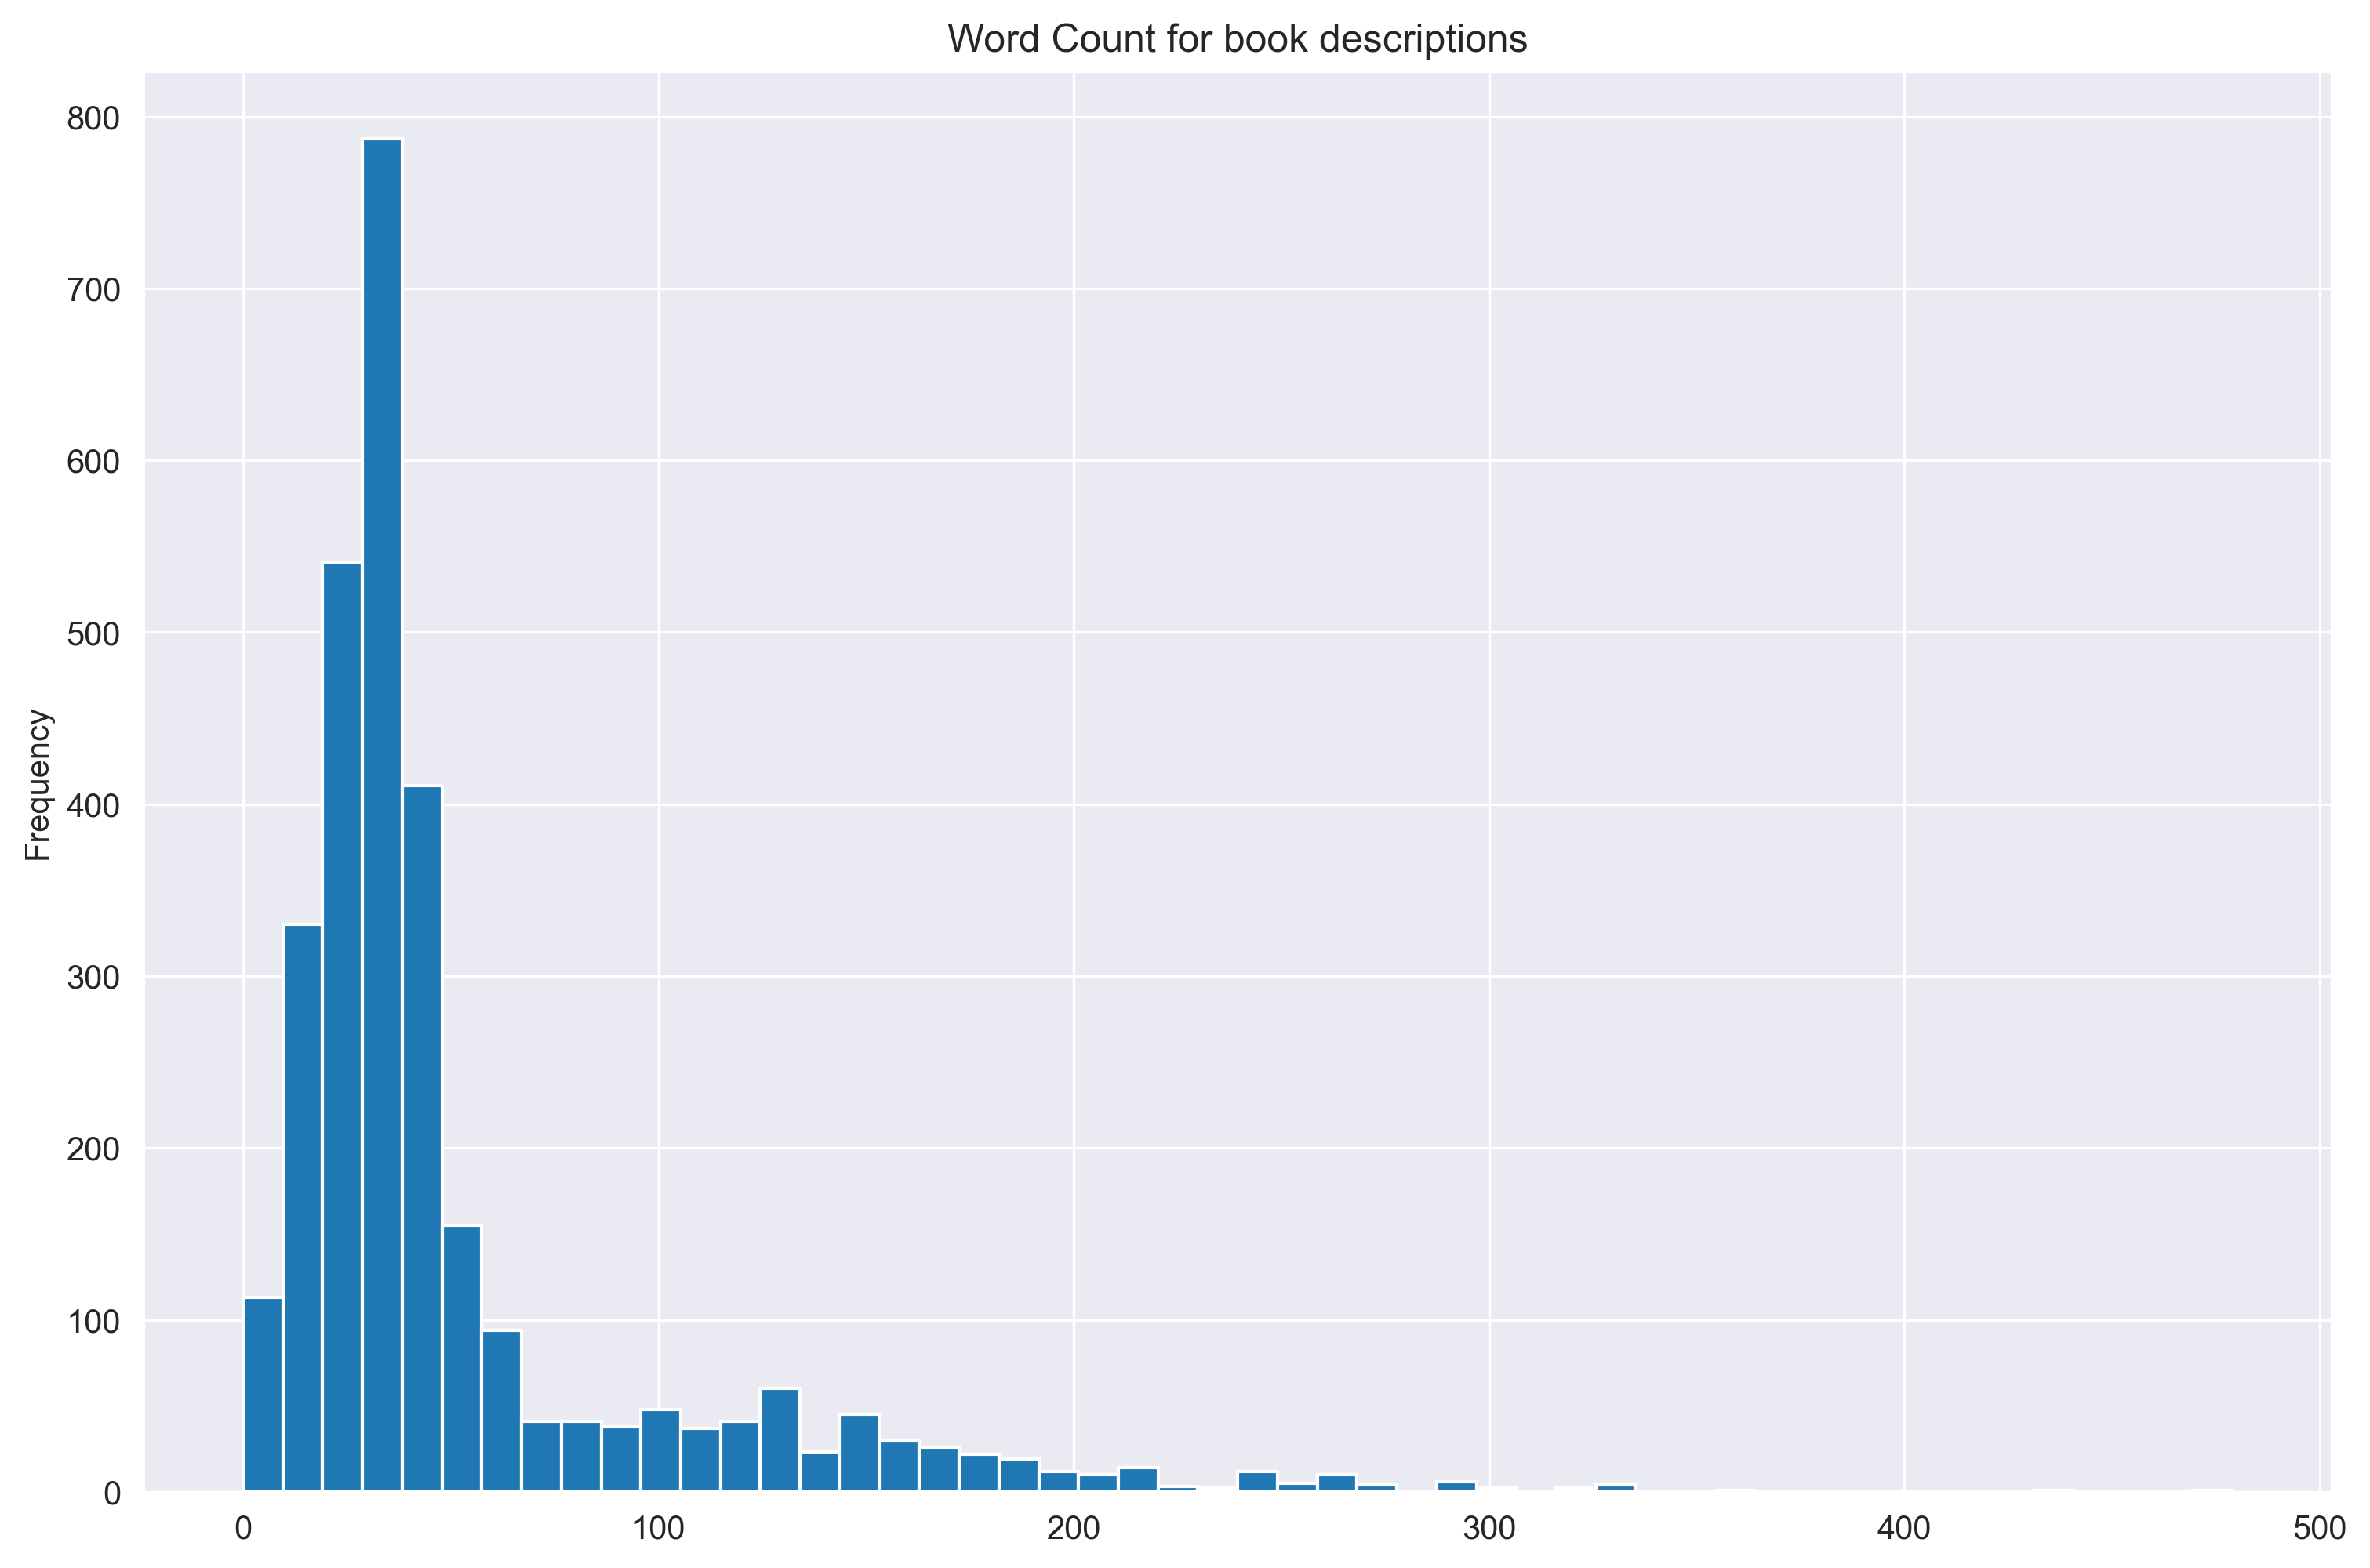

In [30]:
# calculate and plot the word count of book descriptions

books_df1['word_count'] = books_df1['description'].apply(lambda x: len(str(x).split()))# Plotting the word count
books_df1['word_count'].plot(
    kind='hist',
    bins = 50,
    figsize = (12,8),title='Word Count for book descriptions')

<AxesSubplot:title={'center':'Top 15 Part-of-speech tagging for comments'}>

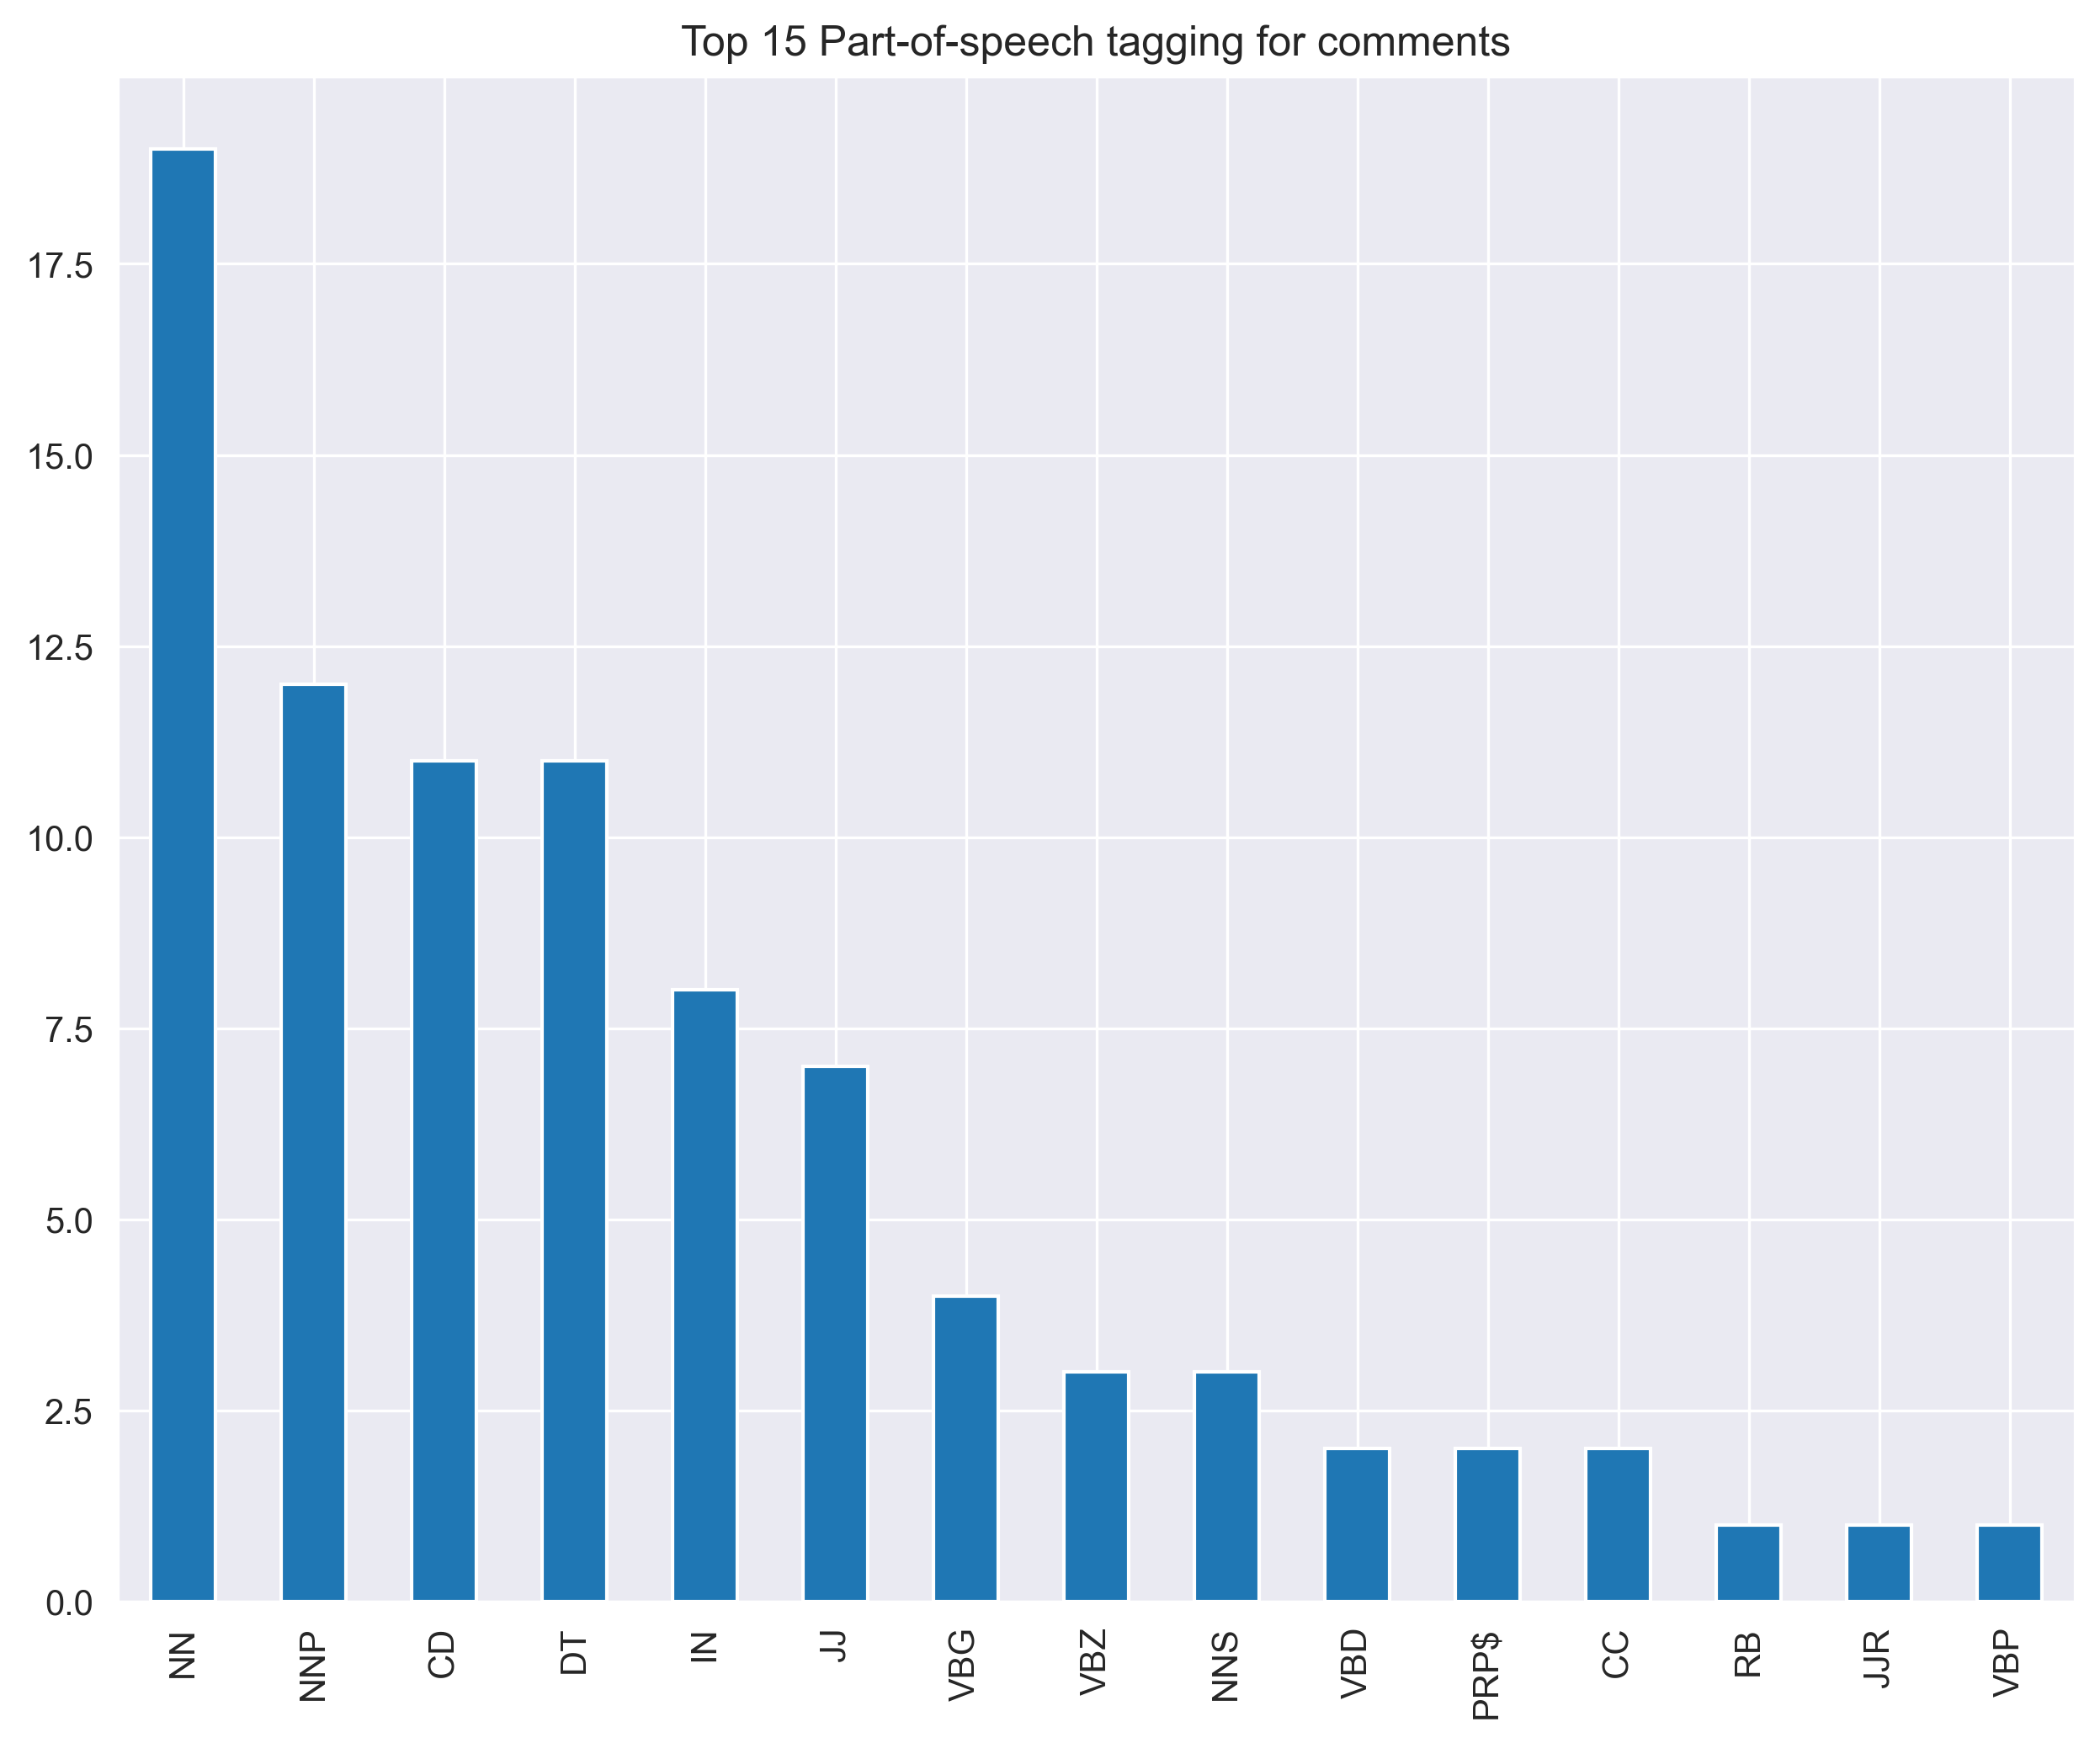

In [31]:
#plot parts of speech tagging

from textblob import TextBlob
blob = TextBlob(str(books_df1['description']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:15]
pos_df.plot(kind = 'bar', figsize=(10, 8), title = "Top 15 Part-of-speech tagging for comments")

In [32]:
import nltk

In [33]:
# remove NON ASCII characters from description
def remove_non_ascii(string):
    return "".join(c for c in string if ord(c) < 128)

# convert text in description into lower case
def make_lower_case(text):
    return text.lower()

# remove stop words from description
def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words('english'))
    text = [word for word in text if not word in stops]
    text = " ".join(text)
    return text

# remove punctuations from description
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

# remove html codes from description
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

In [34]:
#add a new column named 'cleaned_description'

books_df1['cleaned_description'] = books_df1['description'].apply(remove_non_ascii)
books_df1['cleaned_description'] = books_df1.cleaned_description.apply(make_lower_case)
books_df1['cleaned_description'] = books_df1.cleaned_description.apply(remove_stop_words)
books_df1['cleaned_description'] = books_df1.cleaned_description.apply(remove_punctuation)
books_df1['cleaned_description'] = books_df1.cleaned_description.apply(remove_html)

In [35]:
books_df1.head()

,title,authors,categories,thumbnail,description,published_year,word_count,cleaned_description
3,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993,57,memorable mesmerizing heroine jennifer brillia...
12,Warhost of Vastmark,Janny Wurts,Fiction,http://books.google.com/books/content?id=uOL0f...,"Tricked once more by his wily half-brother, Ly...",1995,136,tricked wily half brother lysaer lord light ar...
35,Ocean Star Express,Mark Haddon;Peter Sutton,Juvenile Fiction,http://books.google.com/books/content?id=I2QZA...,Joe and his parents are enjoying a summer holi...,2002,129,joe parents enjoying summer holiday sea ocean ...
37,The Princess of the Chalet School,Elinor Mary Brent-Dyer,Juvenile Fiction,http://books.google.com/books/content?id=EJcQP...,,2000,0,
54,Taken at the Flood,Agatha Christie,Fiction,http://books.google.com/books/content?id=3gWlx...,A Few Weeks After Marrying An Attractive Young...,2002,100,weeks marrying attractive young widow gordon c...


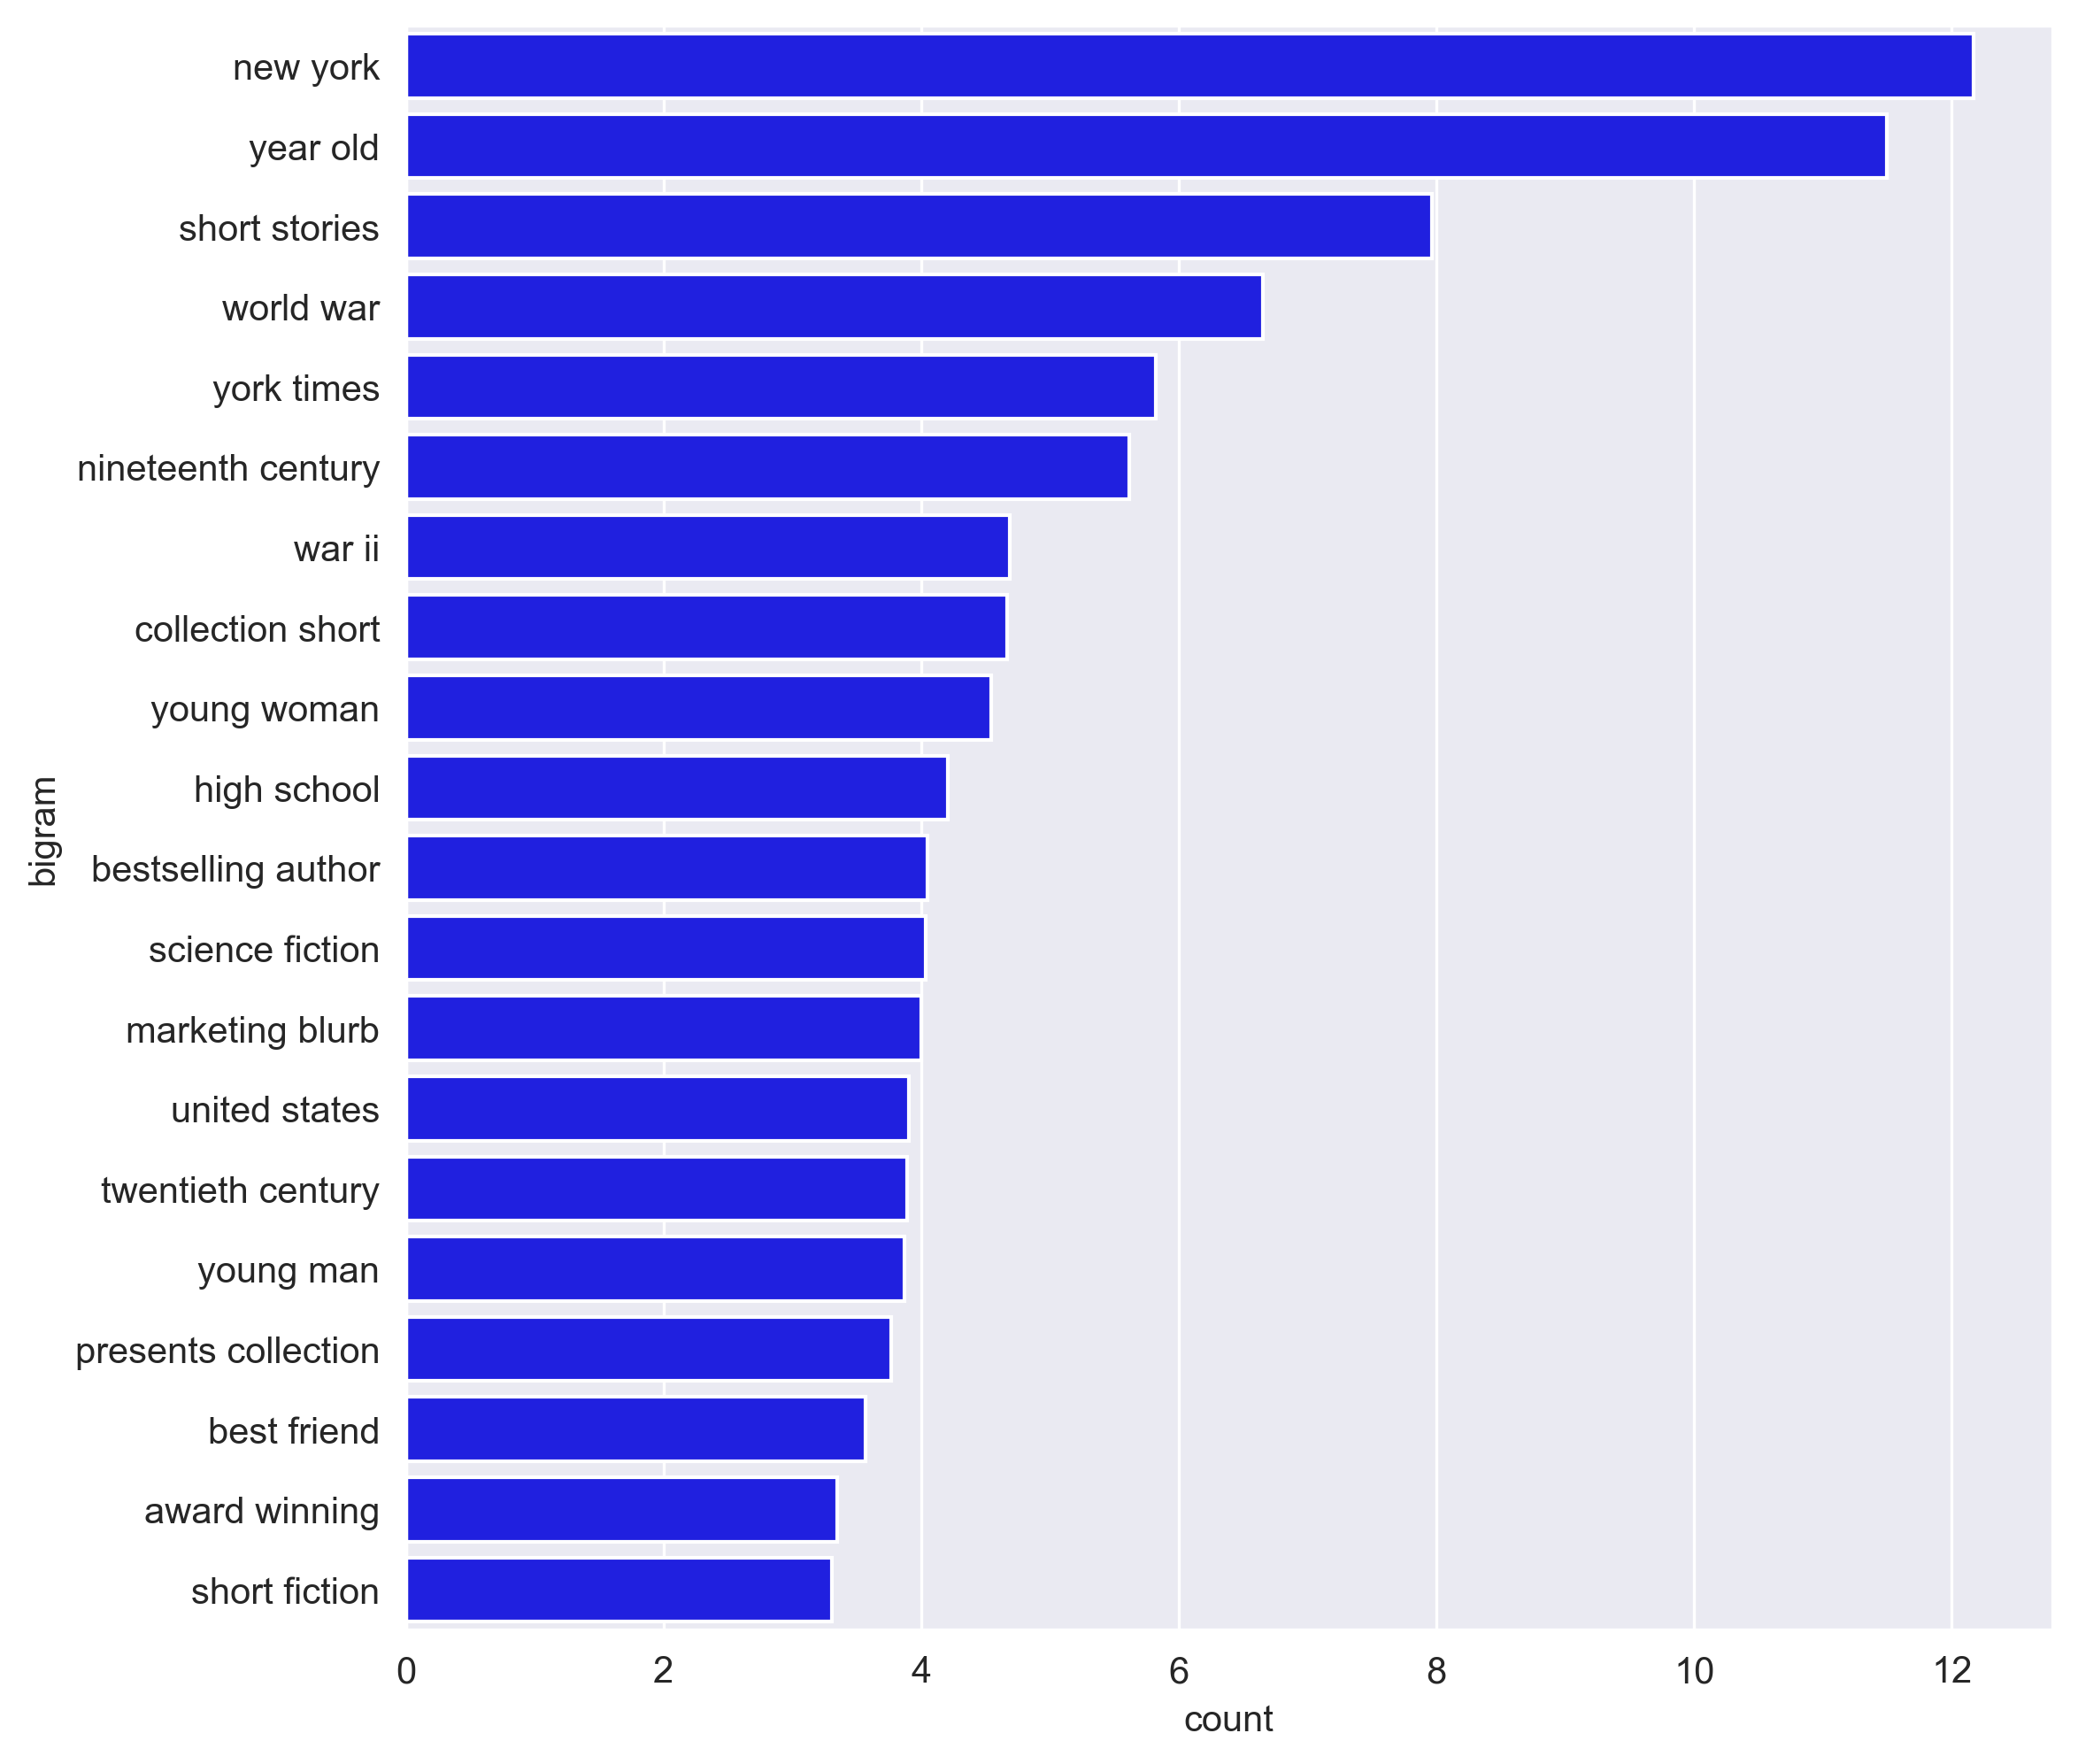

In [36]:
# Use bigram on description
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase=False)
tfidf_matrix = tf.fit_transform(books_df1['cleaned_description'])
total_words = tfidf_matrix.sum(axis=0)

# calculate word frequency and create dataframe and plot
freq = [(word, total_words[0, index]) for word, index in tf.vocabulary_.items()]
freq = sorted(freq, key=lambda x: x[1], reverse=True)

bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 

bigram = bigram.head(20)

plt.figure(figsize=(8, 8))
sns.barplot(x=bigram['count'], y=bigram['bigram'], color='blue')
plt.show()

# Content based filtering

### Make recommendations by Title

In [37]:
def recommend(title, category):
    
    #match the category input with categories
    data = books_df1.loc[books_df1['categories'] == category] 
    #reset index
    data.reset_index(level = 0, inplace = True) 
    
    indices = pd.Series(data.index, index = data['title'])
    
    #convert title into vectors and use bigram
    tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
    tfidf_matrix = tf.fit_transform(data['title'])
    
    #calculate cosine similarity
    similarity = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    #get the index of original title
    index = indices[title]
    
    #similarity scores based on title and genre
    similarity = list(enumerate(similarity[index]))
    #sort the books
    similarity = sorted(similarity, key=lambda x: x[1], reverse=True)
    
    #find top 5 similar books
    similarity  = similarity [1:6]
    
    #find indices of top 5 books
    book_indices = [i[0] for i in similarity]

    #recommendation
    rec = data[['title', 'thumbnail']].iloc[book_indices]
    
    
    print(rec['title'])
    
    for i in rec['thumbnail']:
        response = requests.get(i)
        img = Image.open(BytesIO(response.content))
        plt.figure()
        print(plt.imshow(img))

205                                        Harry Potter
216                         The Harry Potter Collection
347                 Harry Potter and the Goblet of Fire
193             Harry Potter and the Chamber of Secrets
172    Harry Potter and the Chamber of Secrets (Book 2)
Name: title, dtype: object
AxesImage(225,150;1395x906)
AxesImage(225,150;1395x906)
AxesImage(225,150;1395x906)
AxesImage(225,150;1395x906)
AxesImage(225,150;1395x906)


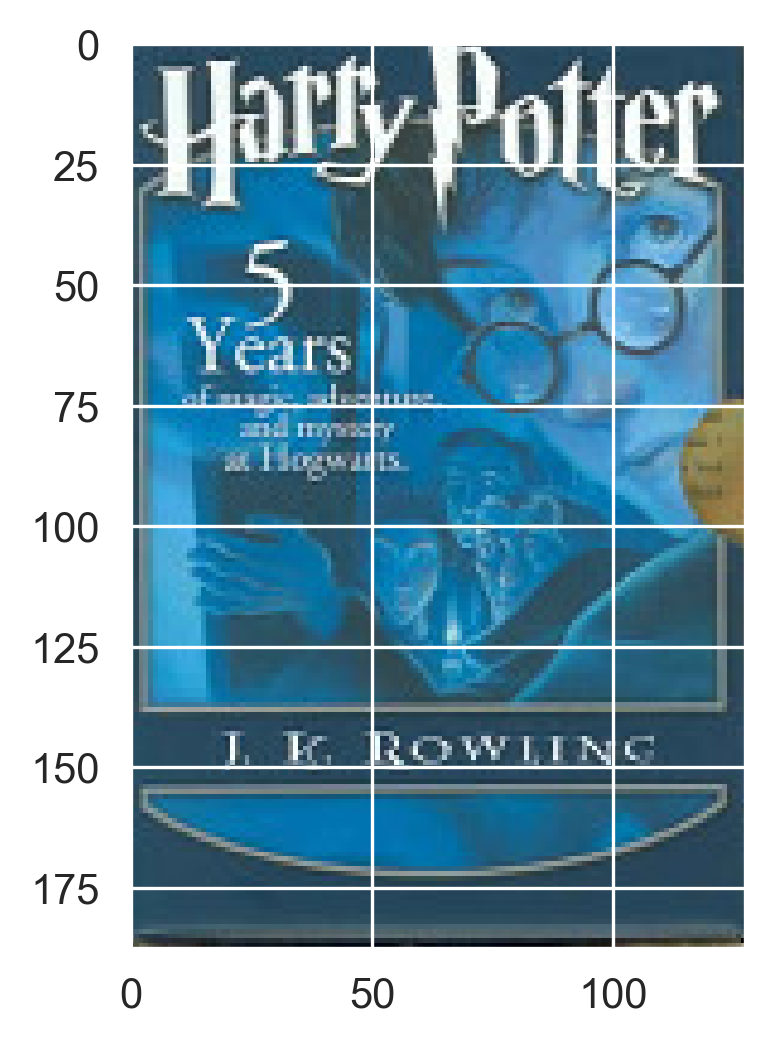

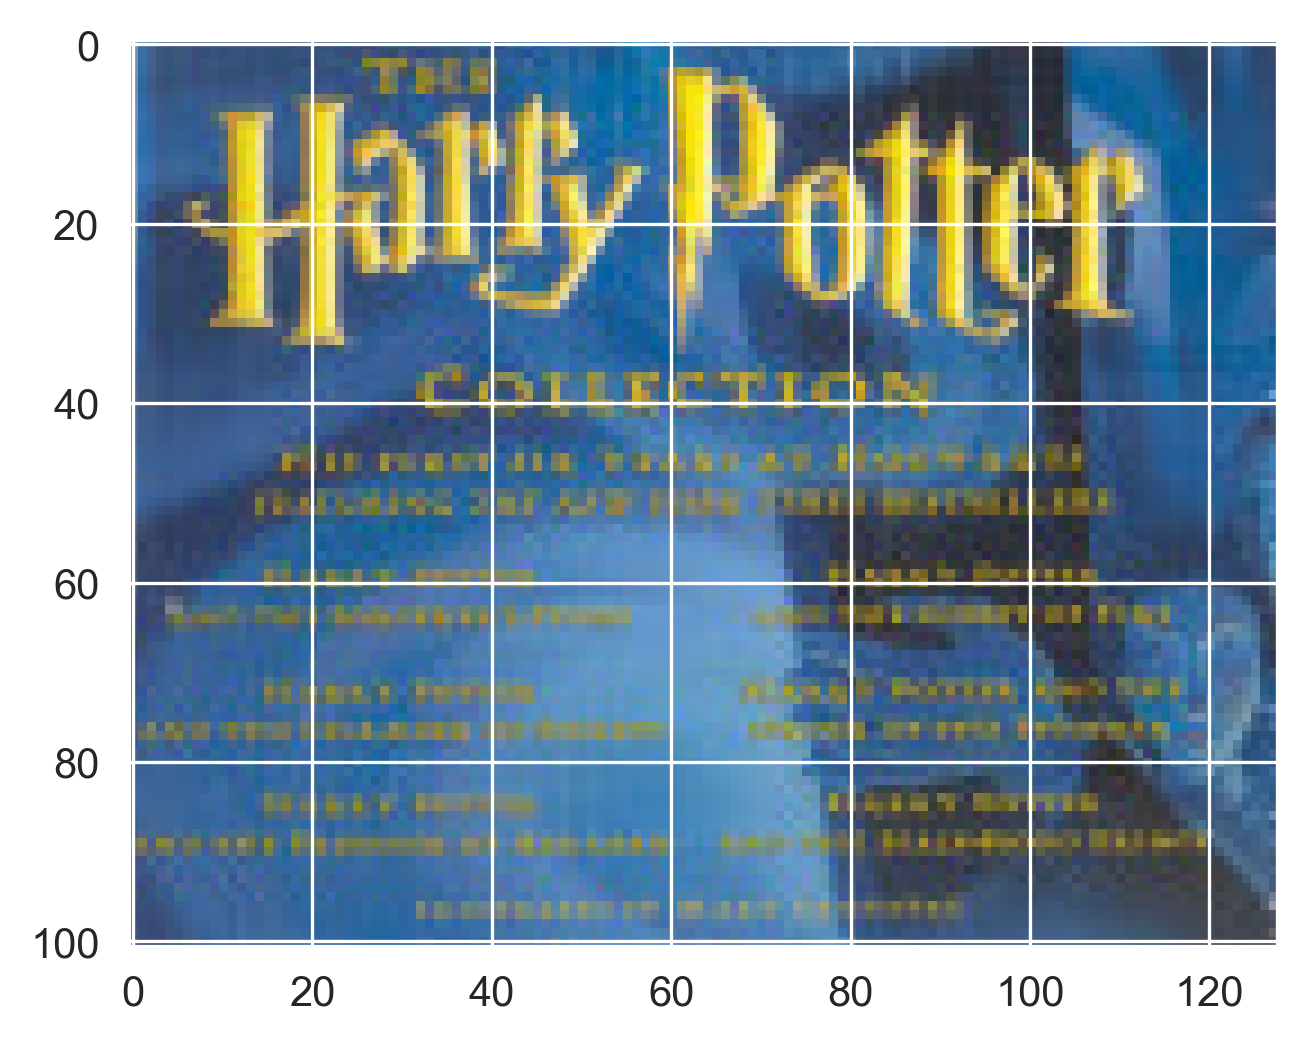

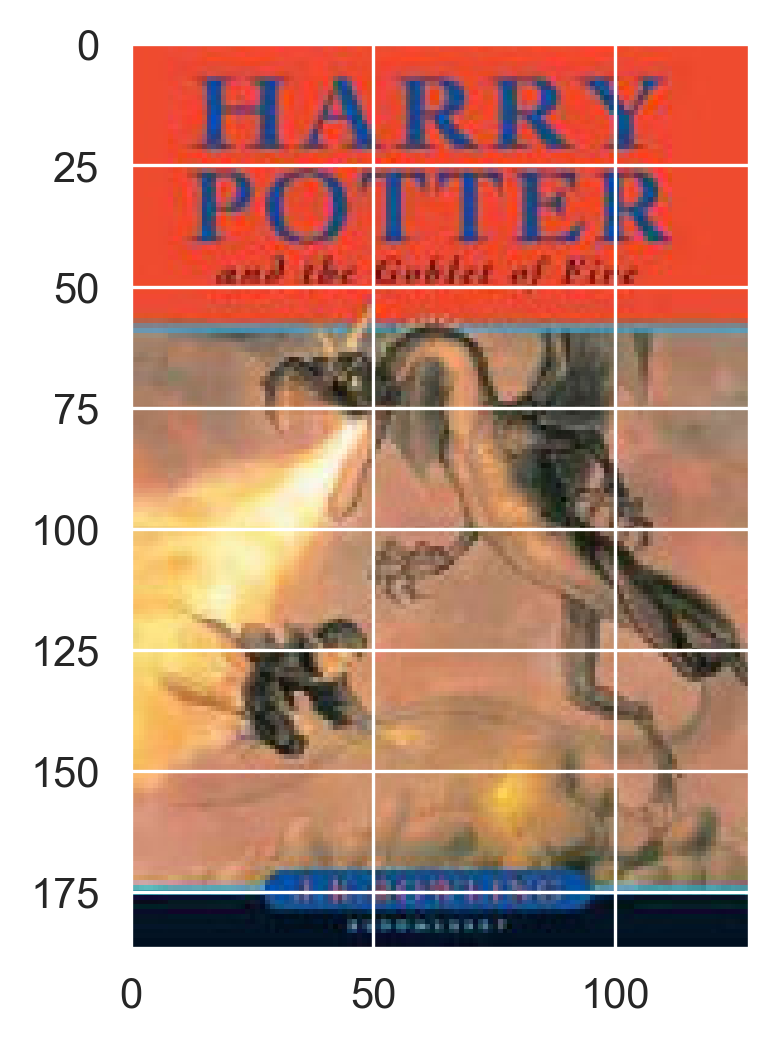

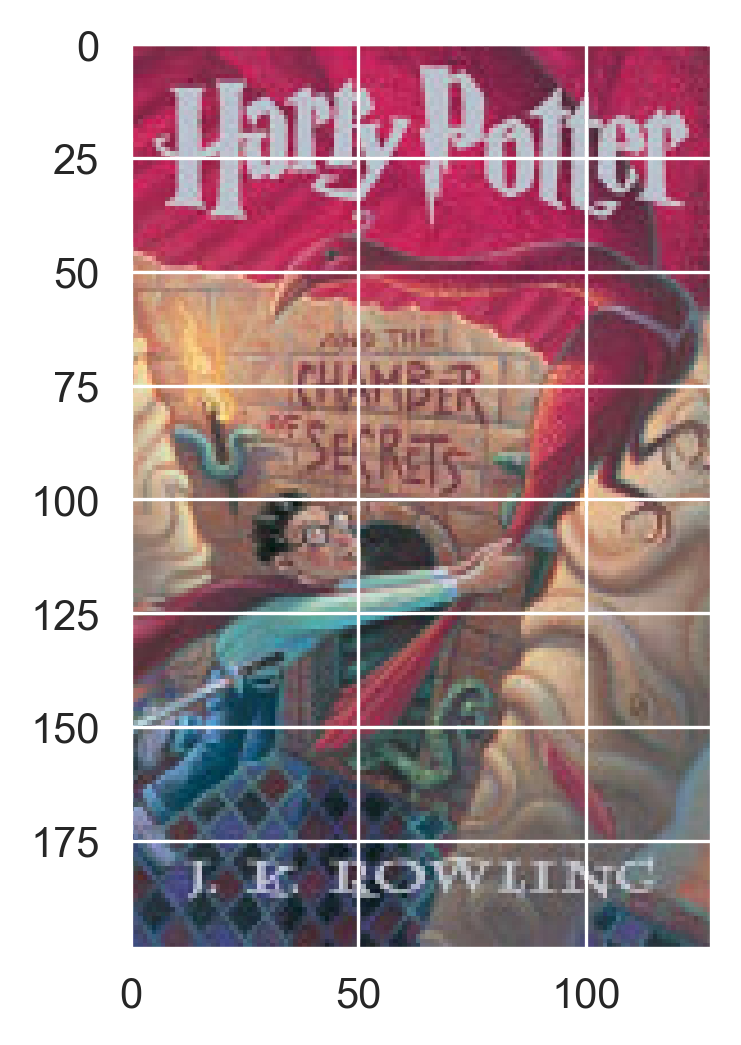

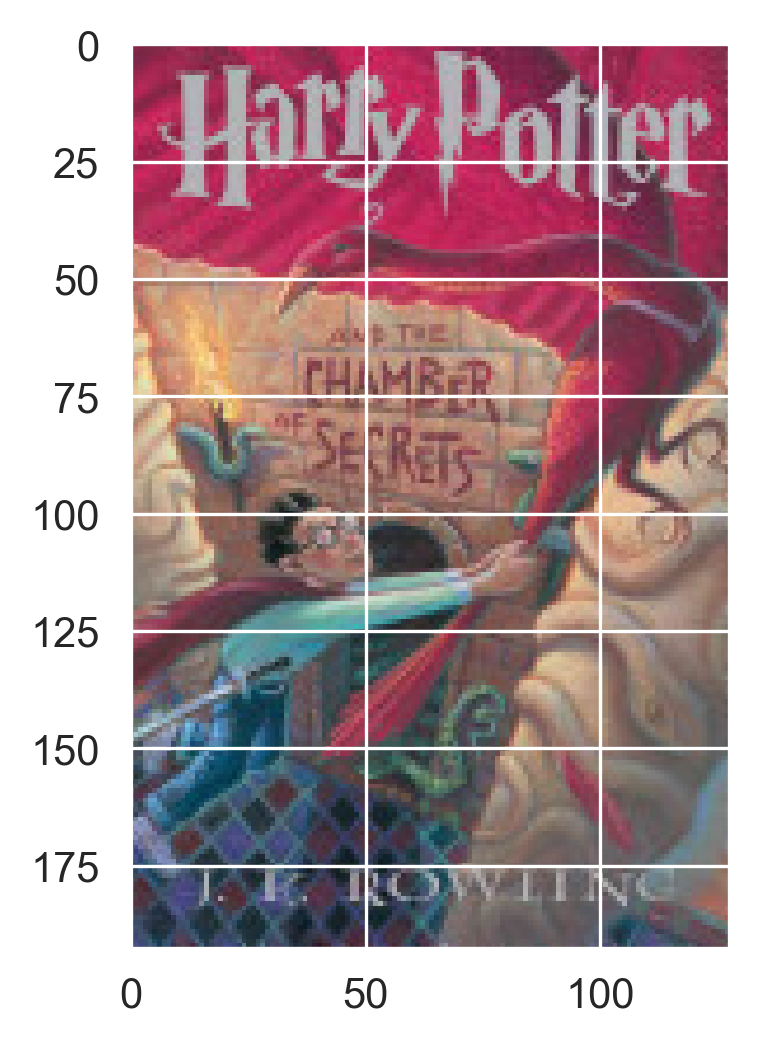

In [38]:
recommend("Harry Potter and the Sorcerer's Stone (Book 1)", "Juvenile Fiction")

### Make recommendations based on description

In [39]:
# Function for recommending books based on Book description. It takes book title and genre as an input.

def recommend(title, category):
    
    #match the category input with categories
    data = books_df1.loc[books_df1['categories'] == category] 
    #reset index
    data.reset_index(level = 0, inplace = True) 
    
    indices = pd.Series(data.index, index = data['title'])
    
    #convert title into vectors and use bigram
    tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
    tfidf_matrix = tf.fit_transform(data['cleaned_description'])
    
    #calculate cosine similarity
    similarity = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    ##get the index of original title
    index = indices[title]
    
    similarity = list(enumerate(similarity[index]))
    #sort the books
    similarity = sorted(similarity, key=lambda x: x[1], reverse=True)
    
    #find top 5 most similar books
    similarity  = similarity [1:6]
    
    #find indies of top 5 books
    book_indices = [i[0] for i in similarity]

    #recommendation
    rec = data[['title', 'thumbnail']].iloc[book_indices]
    
    print(rec['title'])
    
    for i in rec['thumbnail']:
        response = requests.get(i)
        img = Image.open(BytesIO(response.content))
        plt.figure()
        print(plt.imshow(img))

303     All the King's Men
1689        Crime Partners
291     Sodom and Gomorrah
962       The Bride Finder
866              Drop Shot
Name: title, dtype: object
AxesImage(225,150;1395x906)
AxesImage(225,150;1395x906)
AxesImage(225,150;1395x906)
AxesImage(225,150;1395x906)
AxesImage(225,150;1395x906)


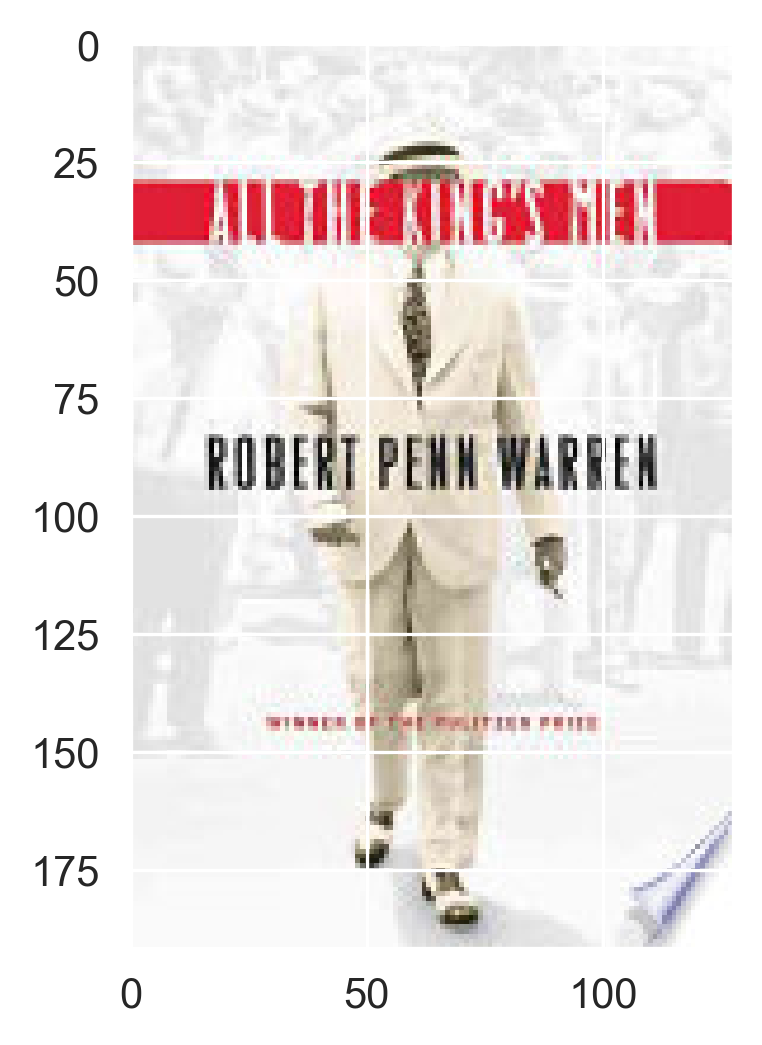

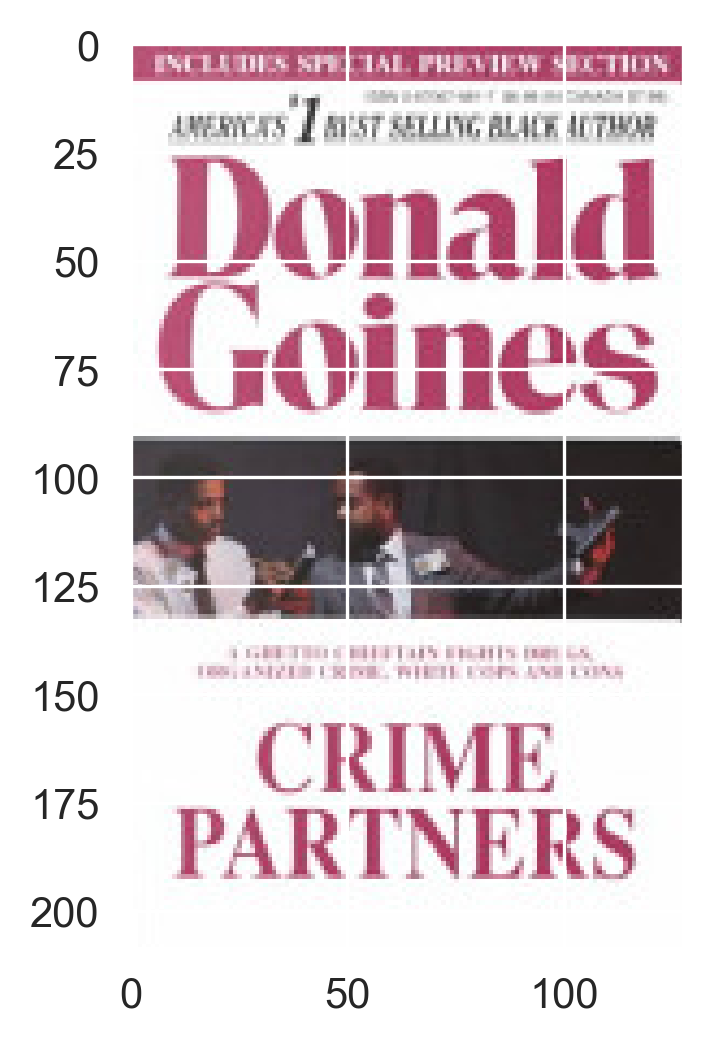

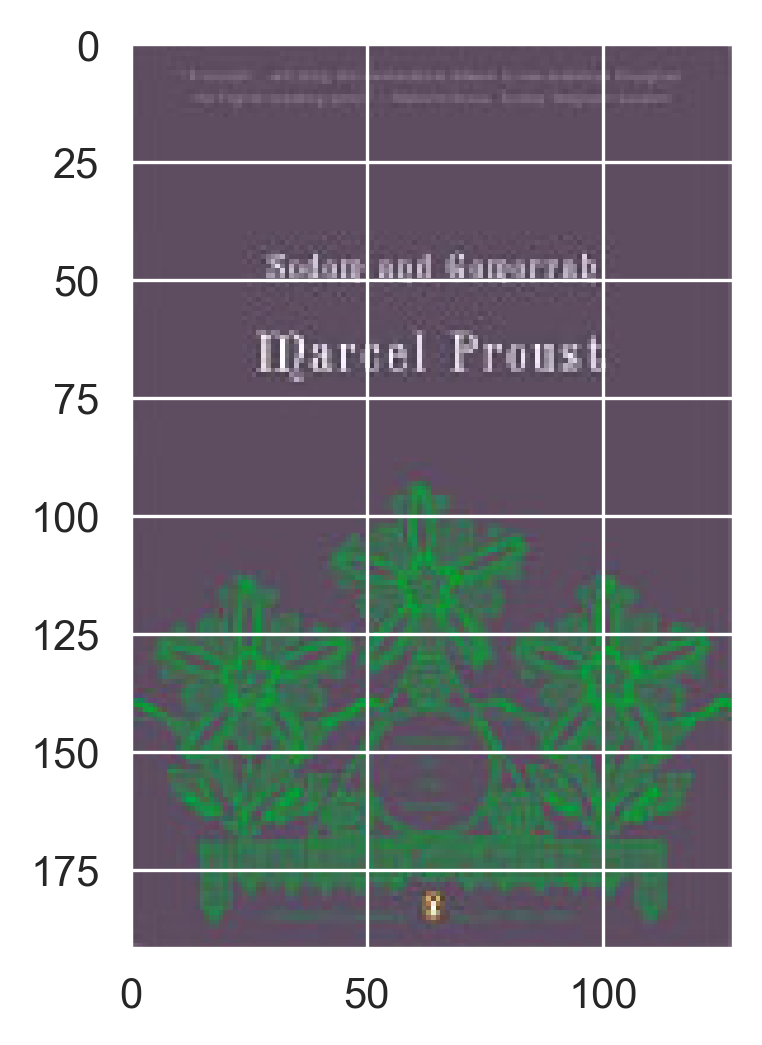

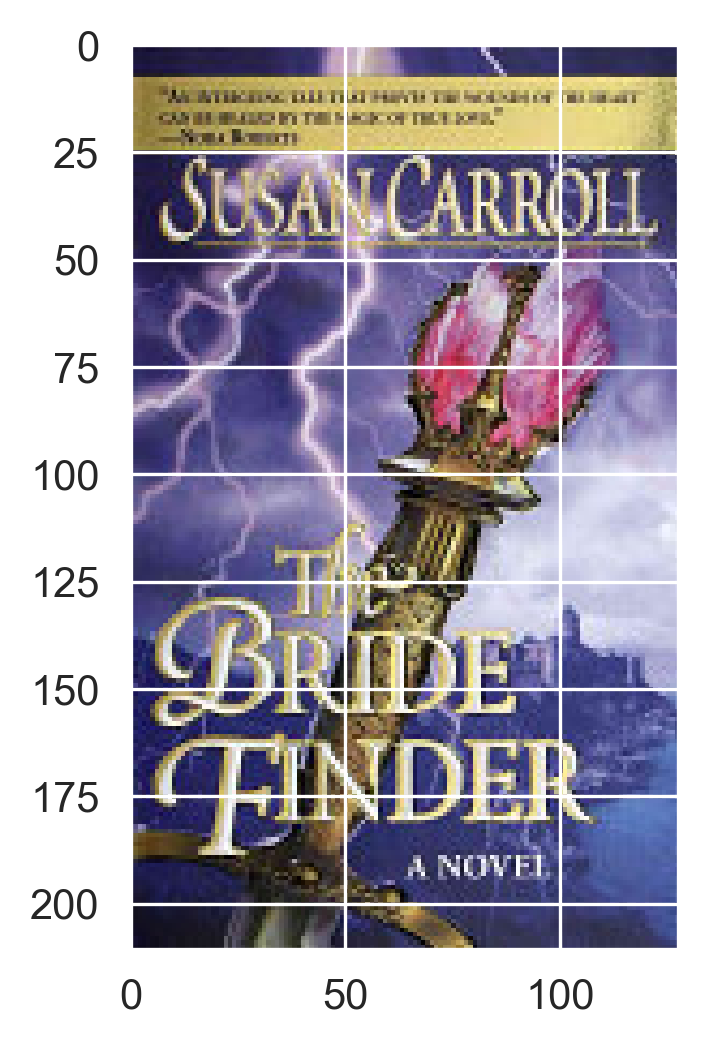

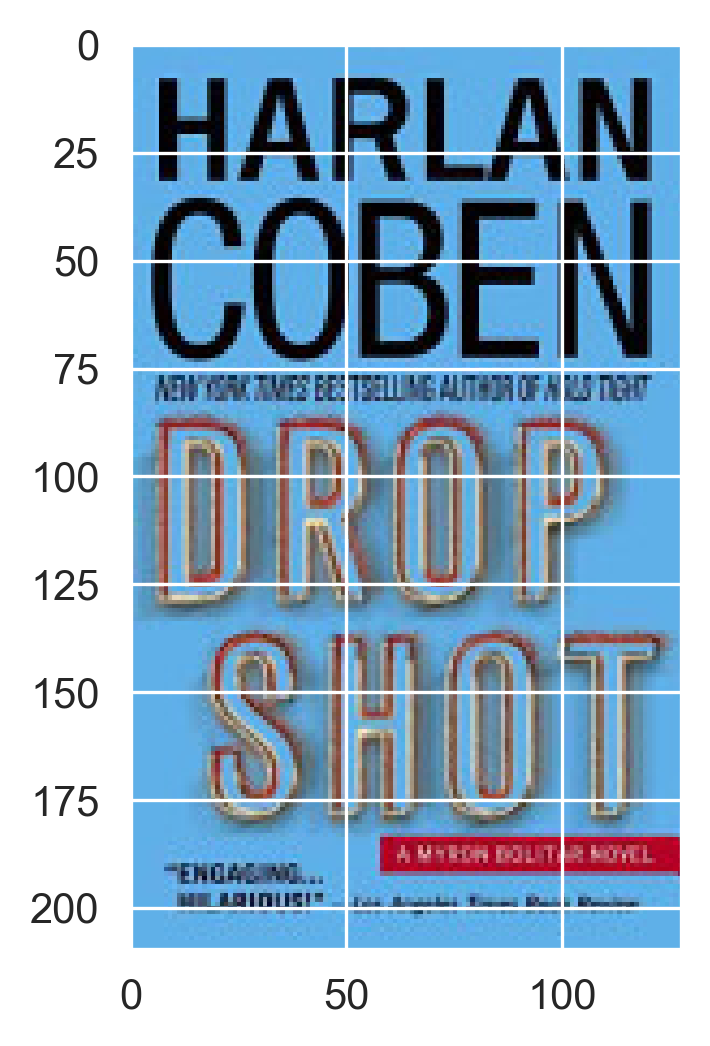

In [40]:
recommend("Rage of angels", "Fiction")

# Finding the Nearest Neighbors

In [51]:
books_df2 = books_df1.copy()
books_df2.index.name = 'book_id'
books_df2.head()

,title,authors,categories,thumbnail,description,published_year,word_count,cleaned_description
book_id,,,,,,,,
3,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993,57,memorable mesmerizing heroine jennifer brillia...
12,Warhost of Vastmark,Janny Wurts,Fiction,http://books.google.com/books/content?id=uOL0f...,"Tricked once more by his wily half-brother, Ly...",1995,136,tricked wily half brother lysaer lord light ar...
35,Ocean Star Express,Mark Haddon;Peter Sutton,Juvenile Fiction,http://books.google.com/books/content?id=I2QZA...,Joe and his parents are enjoying a summer holi...,2002,129,joe parents enjoying summer holiday sea ocean ...
37,The Princess of the Chalet School,Elinor Mary Brent-Dyer,Juvenile Fiction,http://books.google.com/books/content?id=EJcQP...,,2000,0,
54,Taken at the Flood,Agatha Christie,Fiction,http://books.google.com/books/content?id=3gWlx...,A Few Weeks After Marrying An Attractive Young...,2002,100,weeks marrying attractive young widow gordon c...


In [52]:
books_df2.reset_index(inplace=True,drop=True)

In [53]:
#create a new column combining book title, authors and genres

def combine_features(data):
    features = []
    for i in range (0, data.shape[0]):
        features.append (data['title'][i] + ' ' + data['authors'][i] + ' ' + data['categories'][i])
        
    return features

In [54]:
books_df2['combined_features'] = combine_features(books_df2)
books_df2.head()

,title,authors,categories,thumbnail,description,published_year,word_count,cleaned_description,combined_features
0,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993,57,memorable mesmerizing heroine jennifer brillia...,Rage of angels Sidney Sheldon Fiction
1,Warhost of Vastmark,Janny Wurts,Fiction,http://books.google.com/books/content?id=uOL0f...,"Tricked once more by his wily half-brother, Ly...",1995,136,tricked wily half brother lysaer lord light ar...,Warhost of Vastmark Janny Wurts Fiction
2,Ocean Star Express,Mark Haddon;Peter Sutton,Juvenile Fiction,http://books.google.com/books/content?id=I2QZA...,Joe and his parents are enjoying a summer holi...,2002,129,joe parents enjoying summer holiday sea ocean ...,Ocean Star Express Mark Haddon;Peter Sutton Ju...
3,The Princess of the Chalet School,Elinor Mary Brent-Dyer,Juvenile Fiction,http://books.google.com/books/content?id=EJcQP...,,2000,0,,The Princess of the Chalet School Elinor Mary ...
4,Taken at the Flood,Agatha Christie,Fiction,http://books.google.com/books/content?id=3gWlx...,A Few Weeks After Marrying An Attractive Young...,2002,100,weeks marrying attractive young widow gordon c...,Taken at the Flood Agatha Christie Fiction


In [55]:
#convert combined_features into vector
cm = CountVectorizer().fit_transform(books_df2['combined_features'])

In [56]:
#find cosine similarity
cs = cosine_similarity(cm)
print (cs)

[[1.         0.33333333 0.13608276 ... 0.18257419 0.16666667 0.        ]
 [0.33333333 1.         0.13608276 ... 0.18257419 0.16666667 0.        ]
 [0.13608276 0.13608276 1.         ... 0.1490712  0.13608276 0.        ]
 ...
 [0.18257419 0.18257419 0.1490712  ... 1.         0.18257419 0.        ]
 [0.16666667 0.16666667 0.13608276 ... 0.18257419 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [57]:
Title = books_df2['title'][1]

Title

'Warhost of Vastmark'

In [149]:
books_df3 = books.copy()
books_df3 = books_df3.drop(columns=['isbn13', 'isbn10', 'authors', 'categories', 'thumbnail', 'published_year', 'popularity_rating', 'popular_years'])
books_df3

,title,subtitle,description,average_rating,num_pages,ratings_count
0,Gilead,,A NOVEL THAT READERS and critics have been eag...,3.85,247.0,361.0
1,Spider's Web,A Novel,A new 'Christie for Christmas' -- a full-lengt...,3.83,241.0,5164.0
2,The One Tree,,Volume Two of Stephen Donaldson's acclaimed se...,3.97,479.0,172.0
3,Rage of angels,,"A memorable, mesmerizing heroine Jennifer -- b...",3.93,512.0,29532.0
4,The Four Loves,,Lewis' work on the nature of love divides love...,4.15,170.0,33684.0
...,...,...,...,...,...,...
6804,The Monk Who Sold His Ferrari: A Fable About F...,,"Wisdom to Create a Life of Passion, Purpose, a...",3.82,198.0,1568.0
6805,I Am that,Talks with Sri Nisargadatta Maharaj,This collection of the timeless teachings of o...,4.51,531.0,104.0
6806,Secrets Of The Heart,,,4.08,74.0,324.0
6808,The Berlin Phenomenology,,Since the three volume edition ofHegel's Philo...,0.00,210.0,0.0


In [156]:
result_df = books_df3.drop_duplicates(subset=['title', 'description'], keep='first')
print(result_df)

                                                  title  \
0                                                Gilead   
1                                          Spider's Web   
2                                          The One Tree   
3                                        Rage of angels   
4                                        The Four Loves   
...                                                 ...   
6804  The Monk Who Sold His Ferrari: A Fable About F...   
6805                                          I Am that   
6806                               Secrets Of The Heart   
6808                           The Berlin Phenomenology   
6809                          'I'm Telling You Stories'   

                                            subtitle  \
0                                                      
1                                            A Novel   
2                                                      
3                                                      
4          

In [157]:
books_df = result_df.copy()
books_df

,title,subtitle,description,average_rating,num_pages,ratings_count,duplicated
0,Gilead,,A NOVEL THAT READERS and critics have been eag...,3.85,247.0,361.0,False
1,Spider's Web,A Novel,A new 'Christie for Christmas' -- a full-lengt...,3.83,241.0,5164.0,False
2,The One Tree,,Volume Two of Stephen Donaldson's acclaimed se...,3.97,479.0,172.0,False
3,Rage of angels,,"A memorable, mesmerizing heroine Jennifer -- b...",3.93,512.0,29532.0,False
4,The Four Loves,,Lewis' work on the nature of love divides love...,4.15,170.0,33684.0,False
...,...,...,...,...,...,...,...
6804,The Monk Who Sold His Ferrari: A Fable About F...,,"Wisdom to Create a Life of Passion, Purpose, a...",3.82,198.0,1568.0,False
6805,I Am that,Talks with Sri Nisargadatta Maharaj,This collection of the timeless teachings of o...,4.51,531.0,104.0,False
6806,Secrets Of The Heart,,,4.08,74.0,324.0,True
6808,The Berlin Phenomenology,,Since the three volume edition ofHegel's Philo...,0.00,210.0,0.0,False


In [165]:
books_df.sort_values(by='average_rating',ascending=False).head()

,title,subtitle,description,average_rating,num_pages,ratings_count,duplicated
5972,Ecuador Nature Guide,Southwest Forests : Sozoranga Forest Project,The guide provides information on 76 species o...,5.0,96.0,1.0,False
4281,Middlesex Borough,,Protected by the Watchung Mountains on the nor...,5.0,128.0,2.0,False
4306,Bill Gates,Computer Legend,"Presents the life of Bill Gates, from his chil...",5.0,48.0,0.0,False
1441,Fanning the Flame,"Bible, Cross & Mission : Meeting the Challenge...","The Bible, the cross, and the mission – by lea...",5.0,336.0,1.0,False
6671,The Diamond Color Meditation,Color Pathway to the Soul,The Diamond Color Meditation presents an inspi...,5.0,74.0,5.0,False


In [166]:
books_df.sort_values(by='ratings_count',ascending=False).head()

,title,subtitle,description,average_rating,num_pages,ratings_count,duplicated
2698,Harry Potter and the Sorcerer's Stone (Book 1),,"In Harry Potter and the Sorcerer's Stone, Harr...",4.47,320.0,5629932.0,False
3741,"The Hobbit, Or, There and Back Again",,A newly rejacketed edition of the classic tale...,4.26,366.0,2364968.0,False
2710,Harry Potter and the Prisoner of Azkaban (Book 3),,"For twelve long years, the dread fortress of A...",4.55,435.0,2149872.0,False
2661,Harry Potter and the Chamber of Secrets (Book 2),,"In Harry Potter and the Chamber of Secrets, th...",4.41,341.0,2115562.0,False
3745,The Fellowship of the Ring,Being the First Part of the Lord of the Rings,After discovering the true nature of the One R...,4.35,398.0,2009749.0,False


<Figure size 3600x2700 with 0 Axes>

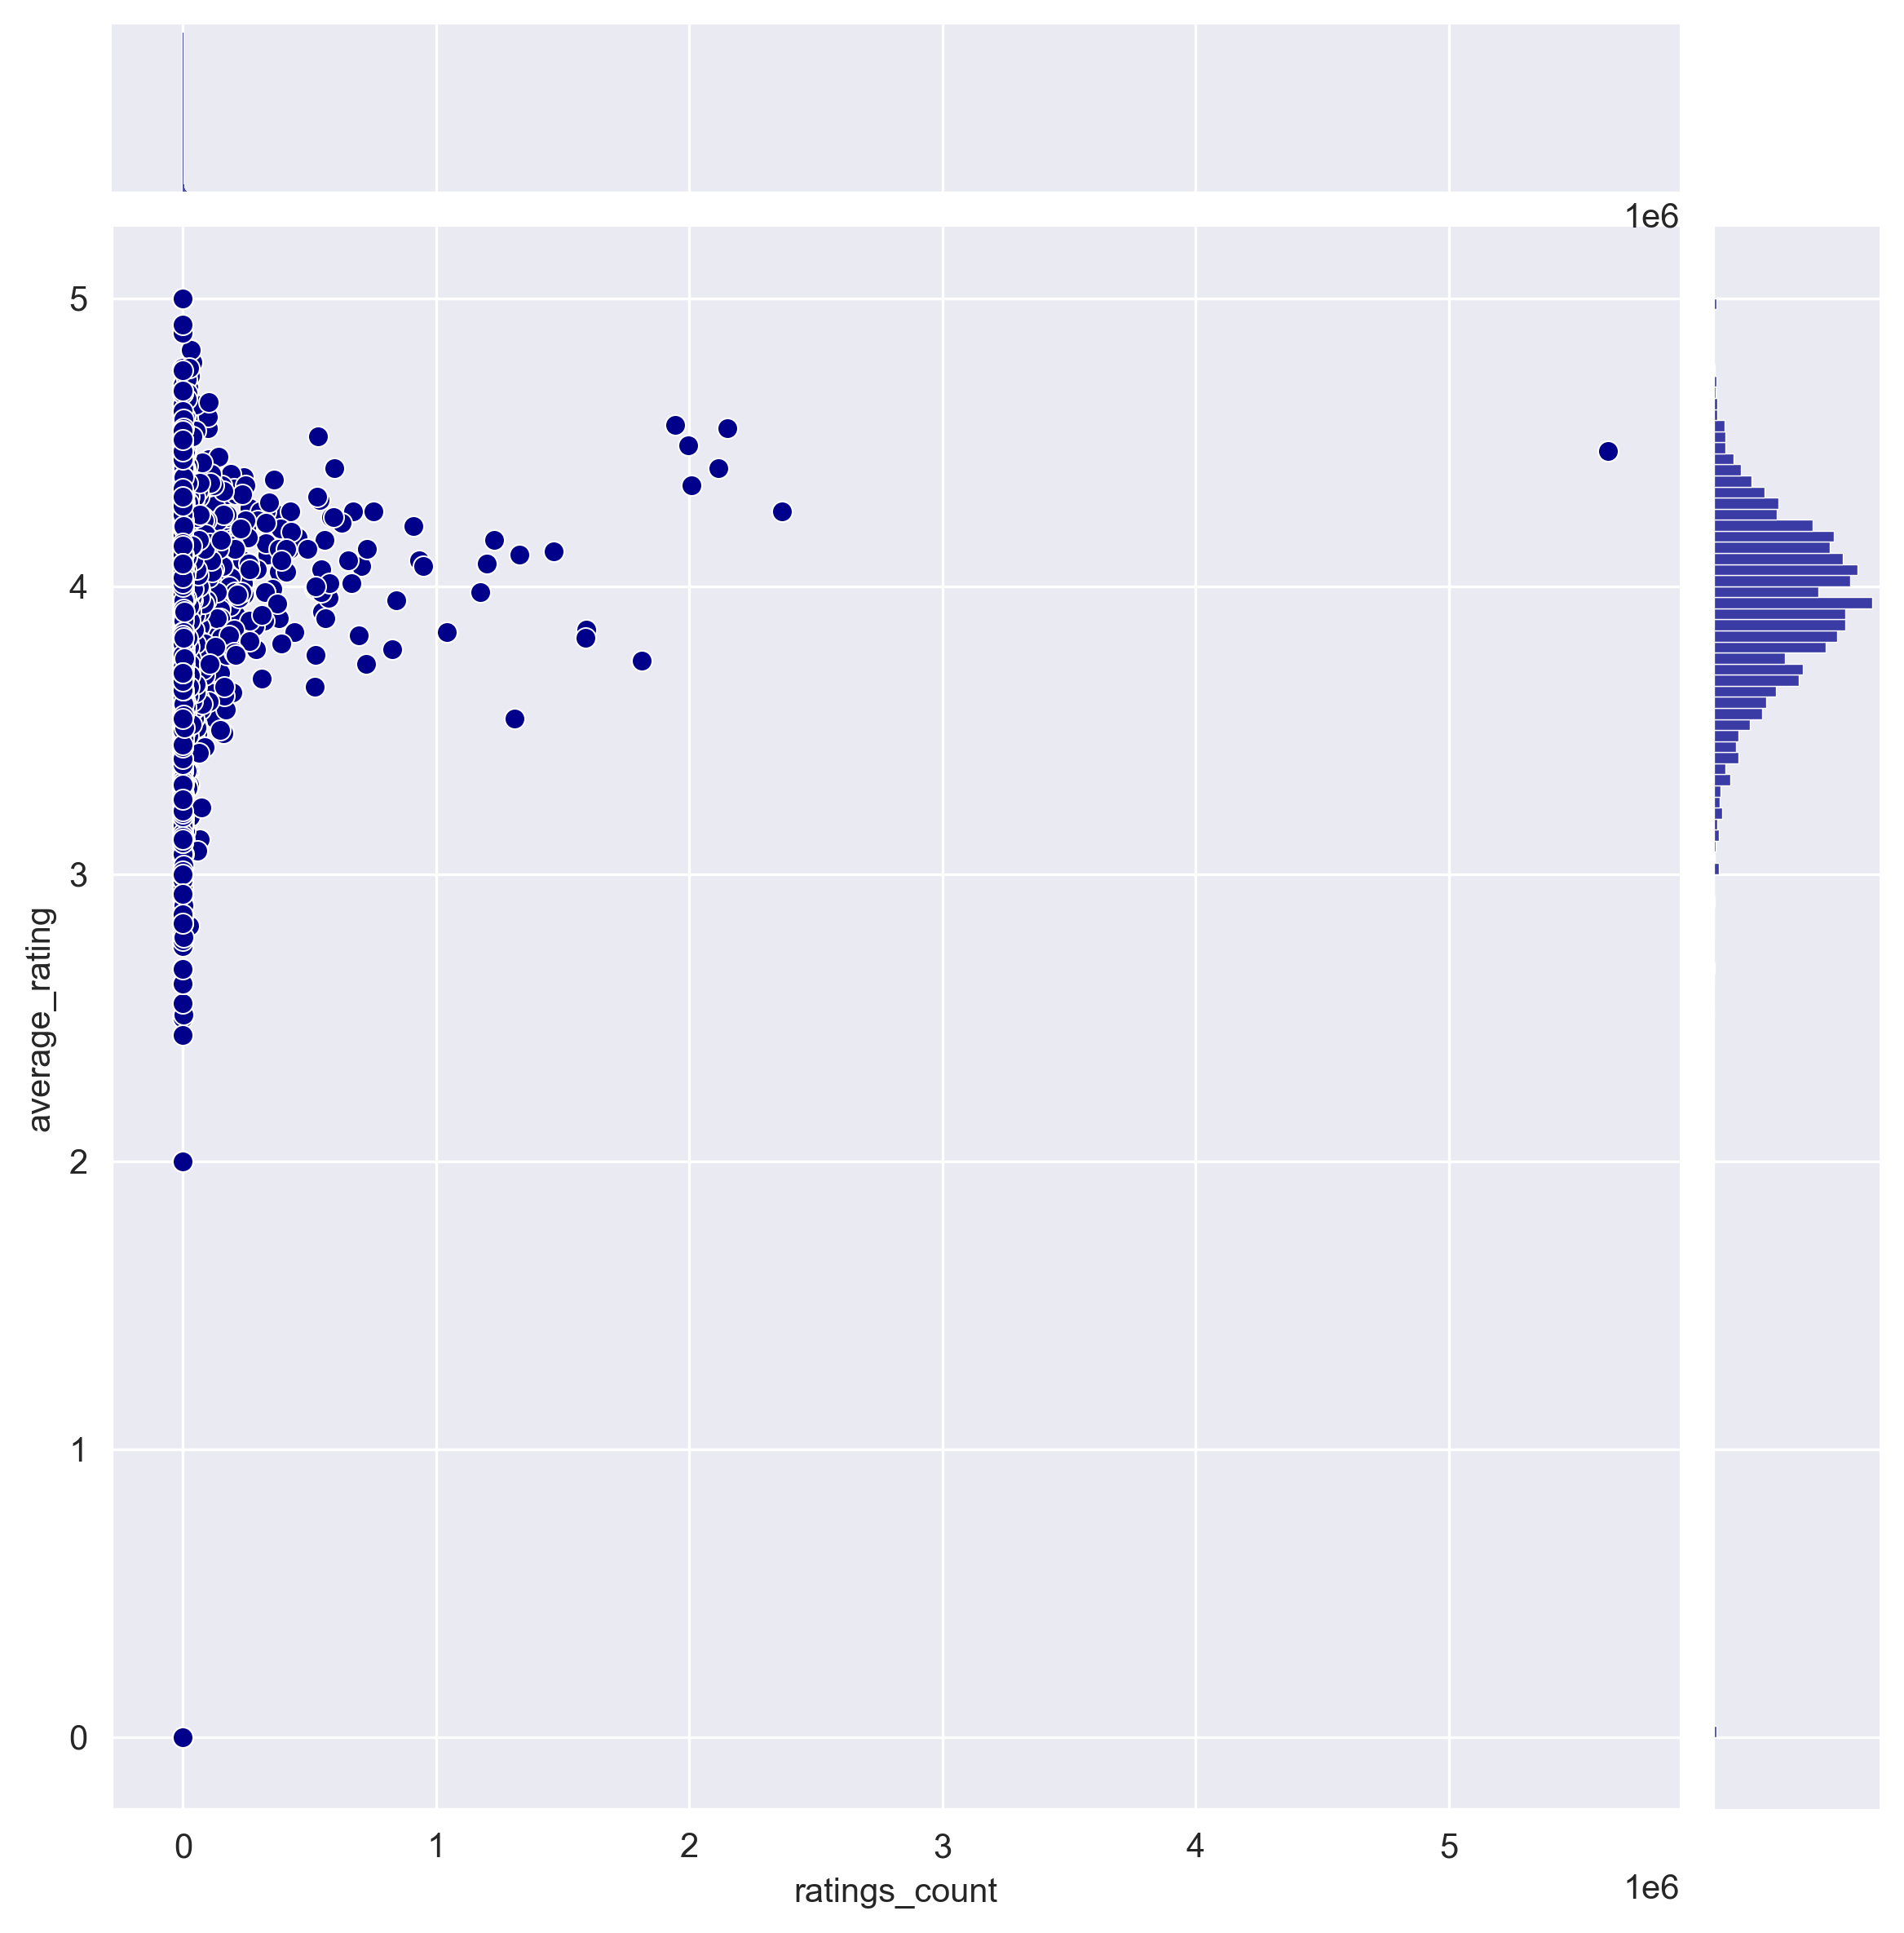

In [167]:
plt.figure(figsize=(12,9))
sns.jointplot(x='ratings_count',y='average_rating',data=books_df,height=8,color='darkblue',ratio=8)

In [190]:
books_df4 = books.copy()
books_df4 = books_df4.drop(columns=['isbn13', 'authors', 'subtitle', 'categories', 'description', 'thumbnail', 'published_year', 'popularity_rating', 'popular_years'])
books_df4

,isbn10,title,average_rating,num_pages,ratings_count
0,0002005883,Gilead,3.85,247.0,361.0
1,0002261987,Spider's Web,3.83,241.0,5164.0
2,0006163831,The One Tree,3.97,479.0,172.0
3,0006178731,Rage of angels,3.93,512.0,29532.0
4,0006280897,The Four Loves,4.15,170.0,33684.0
...,...,...,...,...,...
6804,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,3.82,198.0,1568.0
6805,8185300534,I Am that,4.51,531.0,104.0
6806,8185944601,Secrets Of The Heart,4.08,74.0,324.0
6808,9027712050,The Berlin Phenomenology,0.00,210.0,0.0


In [193]:
combine_book_rating = books_df4.dropna(axis = 0, subset = ['title'])

book_ratingCount = (combine_book_rating.
     groupby(by = ['title'])['average_rating'].
     count().
     reset_index()
    )
book_ratingCount.head()

,title,average_rating
0,"""A"" is for Abductive",1
1,"""Gorgias"" and ""Phaedrus""",1
2,"""Surely You're Joking, Mr. Feynman!""",2
3,"""What Do You Care what Other People Think?""",1
4,$30 Film School,1


In [194]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['average_rating'].describe())

count   6094.000
mean       1.058
std        0.308
min        1.000
25%        1.000
50%        1.000
75%        1.000
max        8.000
Name: average_rating, dtype: float64


In [195]:
print(book_ratingCount['average_rating'].quantile(np.arange(.9, 1, .01)))

0.900   1.000
0.910   1.000
0.920   1.000
0.930   1.000
0.940   1.000
0.950   1.000
0.960   2.000
0.970   2.000
0.980   2.000
0.990   2.000
Name: average_rating, dtype: float64


In [204]:
book_rating = books_df4.drop_duplicates(['title'])
book_rating_pivot = book_rating.pivot(index = 'title', columns = 'isbn10', values = 'average_rating').fillna(0)
book_rating_matrix = csr_matrix(book_rating_pivot.values)

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(book_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [205]:
query_index = np.random.choice(book_rating_pivot.shape[0])
distances, indices = model_knn.kneighbors(book_rating_pivot.iloc[query_index, :].values.reshape(1, -1), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(book_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, book_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Millie's Fling:

1: The Broken Wings, with distance of 1.0:
2: The Brooklyn Bridge, with distance of 1.0:
3: The Brief and Frightening Reign of Phil, with distance of 1.0:
4: The Broken Gun, with distance of 1.0:
5: The Bridge on the Drina, with distance of 1.0:


## Collaborative Filtering using KNN

In [168]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

In [177]:
books_df.index.name = 'book_id'
books_matrix=books_df.pivot_table(index='title',values='average_rating',columns='book_id')
books_matrix

book_id,0,1,2,3,4,5,6,7,8,9,...,6799,6800,6801,6802,6803,6804,6805,6806,6808,6809
title,,,,,,,,,,,,,,,,,,,,,
"""A"" is for Abductive",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""Gorgias"" and ""Phaedrus""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""Surely You're Joking, Mr. Feynman!""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""What Do You Care what Other People Think?""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
$30 Film School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
זן ואומנות האושר,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ゲンジモノガタリ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
五輪書 : 英文版,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
books_matrix=books_matrix.fillna(0)
books_matrix_matrix= csr_matrix(books_matrix.values)

books_matrix

book_id,0,1,2,3,4,5,6,7,8,9,...,6799,6800,6801,6802,6803,6804,6805,6806,6808,6809
title,,,,,,,,,,,,,,,,,,,,,
"""A"" is for Abductive",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""Gorgias"" and ""Phaedrus""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""Surely You're Joking, Mr. Feynman!""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""What Do You Care what Other People Think?""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
$30 Film School,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
זן ואומנות האושר,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ゲンジモノガタリ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
五輪書 : 英文版,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [179]:
books_matrix_matrix

<6094x6436 sparse matrix of type '<class 'numpy.float64'>'
	with 6426 stored elements in Compressed Sparse Row format>

In [180]:
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')  # metric used for evaluation is cosine
model_knn.fit(books_matrix_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [181]:
random_index = np.random.choice(books_matrix.shape[0])  #generating random book indices out of the book_matrix
print("Random chosen index is:",random_index)
distances, indices = model_knn.kneighbors(books_matrix.iloc[random_index,:].values.reshape(1, -1), n_neighbors = 6)

Random chosen index is: 4553


In [186]:
books_matrix.index[6040]

'Yes, Your Teen Is Crazy!'

In [187]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(books_matrix.index[random_index]))  #printing our random indexed Title of Book
    else:
        print('{0}) {1} --- having distance of {2}:'.format(i, books_matrix.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for The Haunted Screen:

1) The Bromeliad Trilogy --- having distance of 1.0:
2) The Brief and Frightening Reign of Phil --- having distance of 1.0:
3) The Broken Gun --- having distance of 1.0:
4) The Broken Wings --- having distance of 1.0:
5) The Bridge on the Drina --- having distance of 1.0:
